# New Avantgarde Model

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import uncertainties as unc
import uncertainties.unumpy as unumpy
from dataclasses import dataclass

In [3]:
import os
import numpy as np
from importlib import reload
from dataclasses import *

import AvantgardeModelUtils
reload(AvantgardeModelUtils)
from AvantgardeModelUtils import *

In [4]:
plt.rcParams.update({'font.size': 12})

In [4]:
# plot affinity Nk dependence
def load_data(fname, columns=['id','avantgarde', 'affinity', 'affinityGoal', 'step']):
    data = pd.read_csv(fname, usecols=columns)
    return data

avantgarde = lambda data, step: np.array(data[data["step"] == step]["avantgarde"])
affinityGoal = lambda data, step: np.array(data.query("step == @step").get("affinityGoal"))
conviction = lambda data, step: np.array(data.query("step == @step").get("affinityGoal"))
affinity = lambda data, step: np.array(data.query("step == @step").get("affinity"))

grid = lambda data, step: affinity(data, step).reshape(100, 100)
gridAvant = lambda data, step: avantgarde(data, step).reshape(100, 100)
gridGoal = lambda data, step: affinityGoal(data, step).reshape(100, 100)

grid = lambda data, step, size: affinity(data, step).reshape(size, size)
gridAvant = lambda data, step, size: avantgarde(data, step).reshape(size, size)
gridGoal = lambda data, step, size: affinityGoal(data, step).reshape(size, size)

In [5]:
gridGoalRolled = lambda data, step, size, shift: np.roll(affinityGoal(data, step), shift).reshape(size, size)

In [6]:
cmap_grey = sns.dark_palette("#fff")
cmap_green_red = sns.diverging_palette(10, 150, s=100, l=40, sep=1, as_cmap=True)
cmap_green_red_gap = sns.diverging_palette(10, 150, s=100, l=40, sep=33, as_cmap=True)
sns.set_palette(sns.diverging_palette(10, 150, s=100, l=40, sep=1))

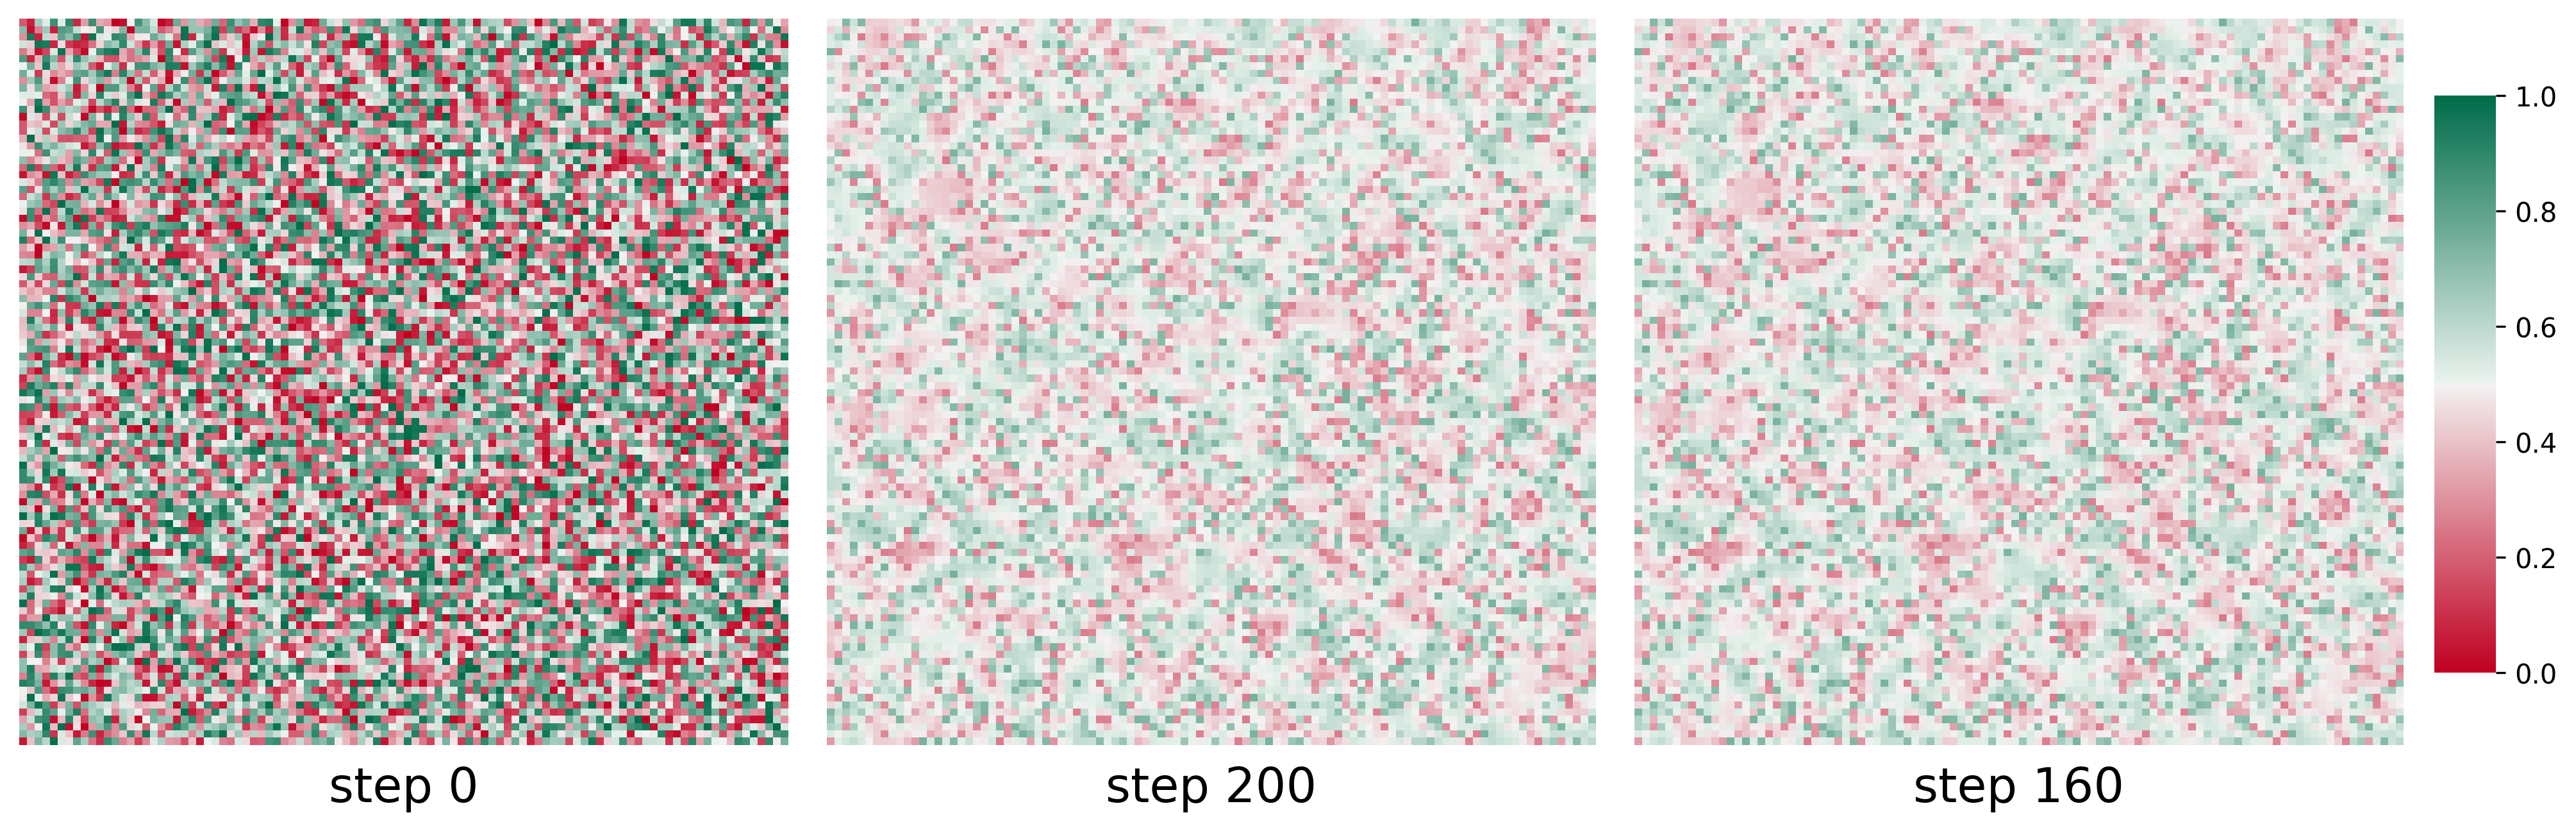

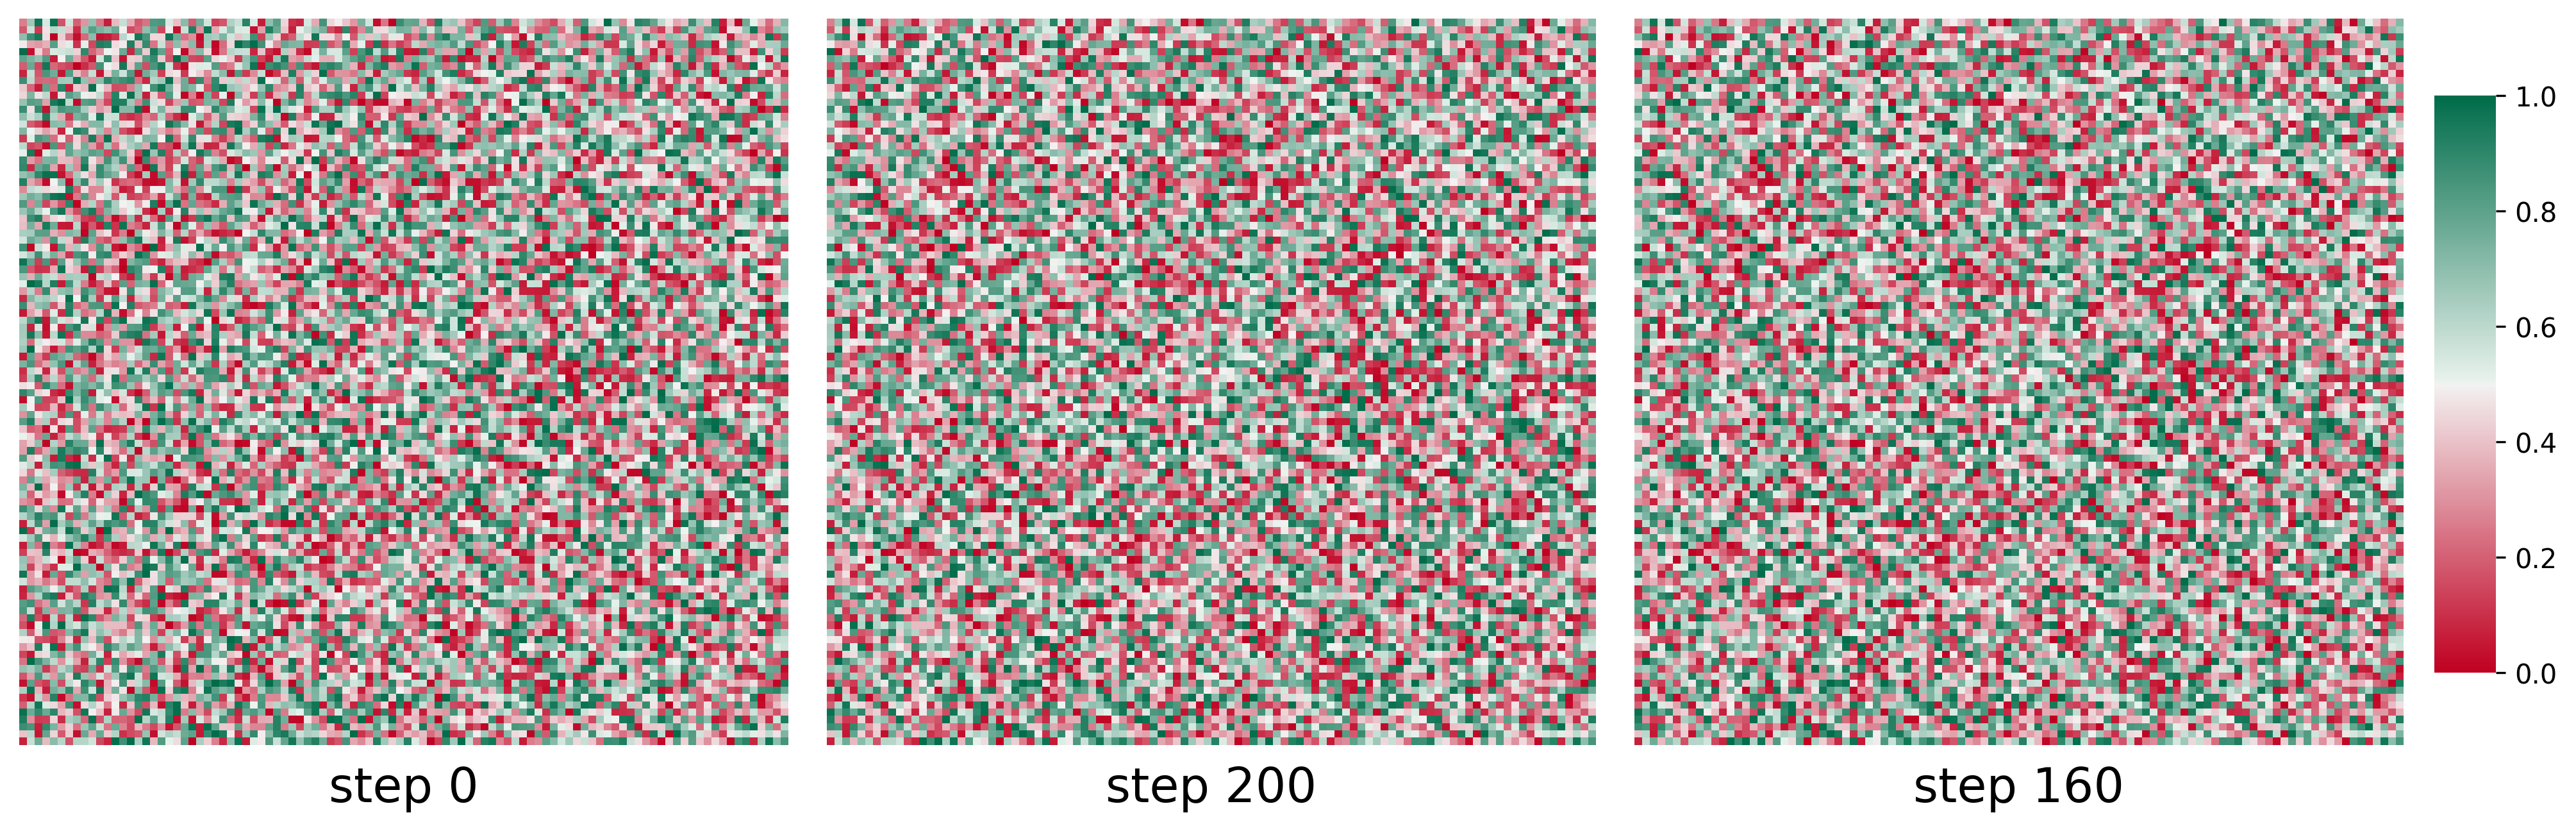

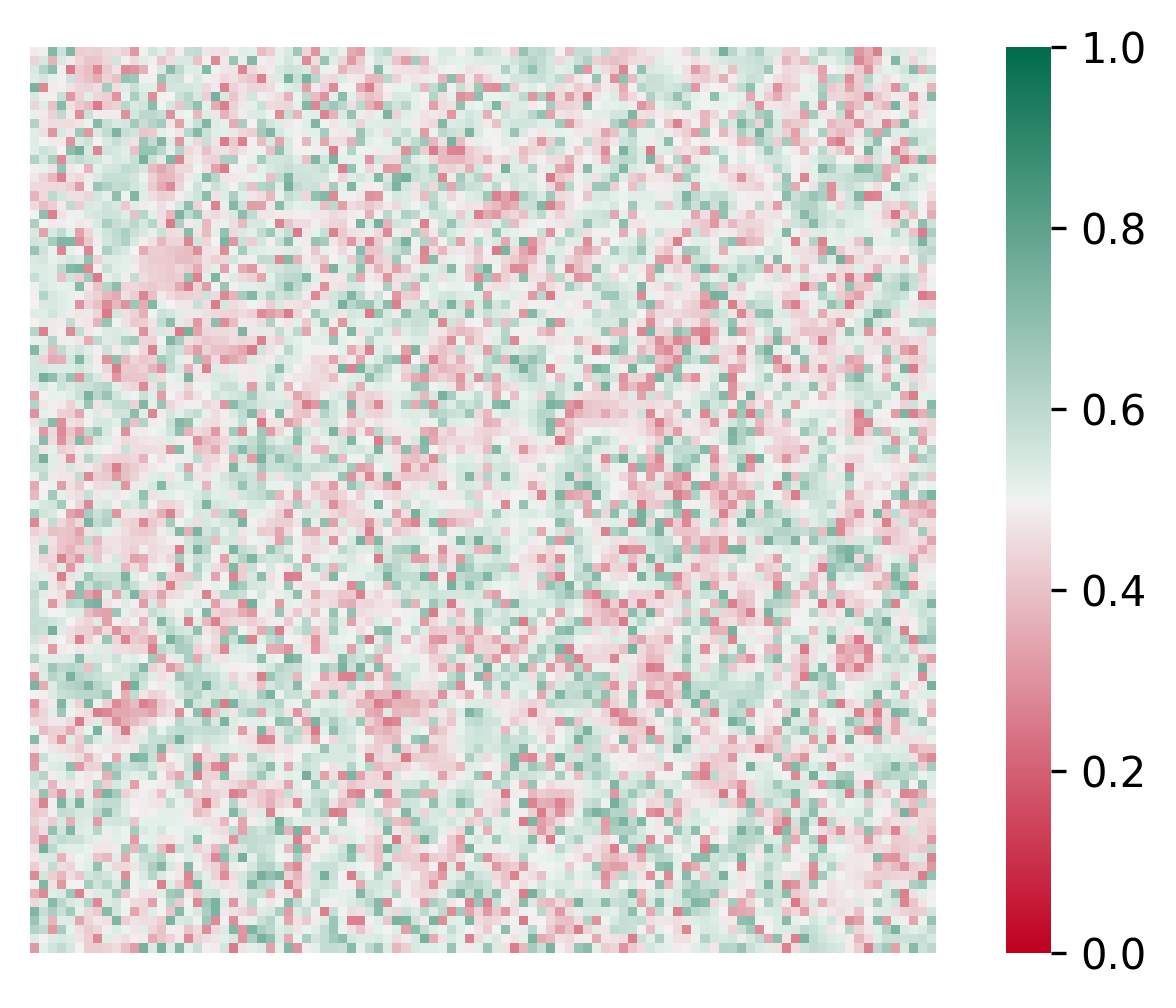

In [17]:

#f1 = "../data/data_po_N-1600_Np-15nn4euclid_No-x_tau-10.0_step-2_ap-0.5_ao-0.5_bounded_init-beta-0.6-4.0.csv"
#f1 = "../data/po100k/data_Np-25_Nf-x_No-25_mix_real_tau-10.0_ap-0.5_ao-0.5_init-beta-0.6-4.0_seed_100.csv"
#f1 = "../data/avantgardeGoal/100k/data_bubble-4-r8_avantgarde-uniform_affinity-uniform_goal-normal-0.6-0.2_100.csv"
f1 = "../data/avantgardeGoal/100k/data_improved_avantgarde-uniform_affinity-uniform_goal-uniform_100.csv"
#f1 = "../data/avantgardeGoal/100k/bubble/data_e-3_r-3_avantgarde-uniform_affinity-uniform_goal-normal-0.6-0.2_100.csv"
#f1 = "../data/avantgardeGoal/100k/radius/data_e-2_avantgarde-uniform_affinity-uniform_goal-uniform100.csv"
#f1 = "../data/conviction/tautest/data_avantgarde-uniform_affinity-uniform_goal-uniform_tau-10_100.csv"
f1 = "../data/constant_avantgarde/data_avantgarde-0.80_seed-100.csv"
dtest = load_data(f1)#, columns=['id','avantgarde', 'affinity', 'step'])

fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharex=True, sharey=True)

#sns.set(font_scale=)
#dtest = data_dict[6040]
steps = (0, 200, 160)
cbar_ax = fig.add_axes([.91, .2, .02, .6])
#ref = gridAvant(dtest, 100).transpose()*0.5 + 0.5
for i, ax in enumerate(axes.flatten()):
    step = steps[i]
    sns.heatmap(ax=ax, data=grid(dtest, step, 100),  vmin=0., vmax=1.0, cbar=i==0, cbar_ax=cbar_ax, cmap=cmap_green_red)
    cl = "black"#'black' if affinity(data, step).mean() > 0.4 else 'white'
    ax.set_title(f"step {step}", x=0.5, y=-0.1, color=cl, fontsize=18)
    
for ax in axes.flatten():
    ax.tick_params(left=False, bottom=False)
    ax.set(xticklabels=[], yticklabels=[])

plt.subplots_adjust(wspace=0.05, hspace=0.05)

fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharex=True, sharey=True)
cbar_ax = fig.add_axes([.91, .2, .02, .6])
for i, ax in enumerate(axes.flatten()):
    step = steps[i]
    sns.heatmap(ax=ax, data=gridGoalRolled(dtest, step, 100, 0),  vmin=0., vmax=1.0, cbar=i==0, cbar_ax=cbar_ax, cmap=cmap_green_red)
    cl = "black"#'black' if affinity(data, step).mean() > 0.4 else 'white'
    ax.set_title(f"step {step}", x=0.5, y=-0.1, color=cl, fontsize=18)
    
for ax in axes.flatten():
    ax.tick_params(left=False, bottom=False)
    ax.set(xticklabels=[], yticklabels=[])

plt.subplots_adjust(wspace=0.05, hspace=0.05)

#fig, ax = plt.subplots(1, 1)
#cbar_ax = fig.add_axes([.91, .2, .02, .6])
plt.figure()

ax = sns.heatmap(data=grid(dtest, 200, 100),  vmin=0., vmax=1.0, cmap=cmap_green_red, square=True)
cl = "black"#'black' if affinity(data, step).mean() > 0.4 else 'white'
#ax.set_title(f"step {0}", x=0.5, y=-0.1, color=cl, fontsize=18)
ax.tick_params(left=False, bottom=False)
ax.set(xticklabels=[], yticklabels=[])

plt.subplots_adjust(wspace=0.05, hspace=0.05)

In [12]:
#helper to keep plots as squares
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)
    
def grid_plot(data,colormap,ax):
    grid = ax.pcolormesh(data,cmap=colormap)
    ax.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
    ax.tick_params(
        axis='y',          # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        right=False,         # ticks along the top edge are off
        labelleft=False)
    set_size(4,4,ax=ax)
    ax.set_aspect(1)
    return grid

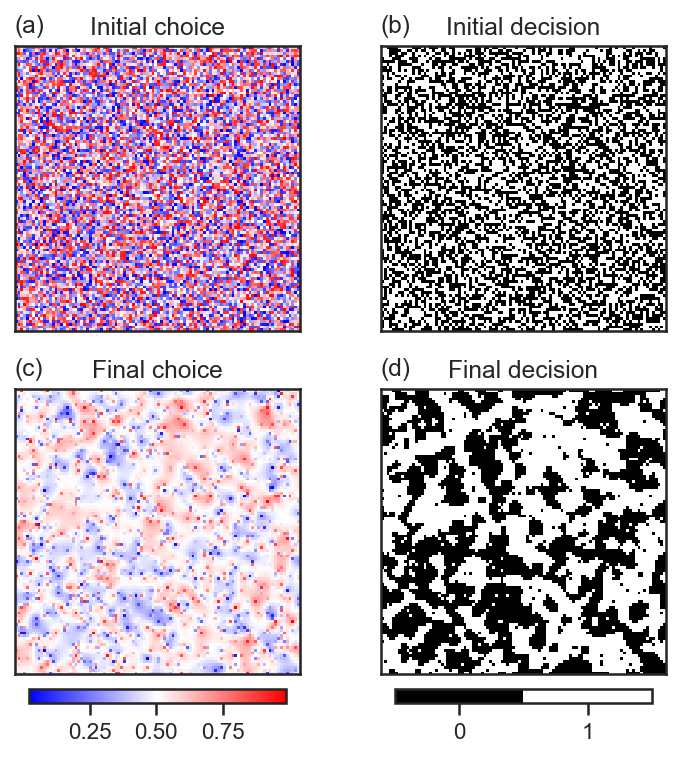

In [13]:
file = "../data/conviction/data_longrun_avantgarde-uniform_affinity-uniform_goal-uniform_tau-1_100.csv"
data_uniform = LoadSimulation(file)

import string

startStep = 0
endStep = 800
start_choice_grid = Grid(Choice(data_uniform, startStep))
start_decision_grid = Grid(Choice(data_uniform, startStep) > 0.5)
final_choice_grid = Grid(Choice(data_uniform, endStep))
final_decision_grid = Grid(Choice(data_uniform, endStep) > 0.5)

colors = ((0, 0, 0), (1, 1, 1))
cmap_black_white = LinearSegmentedColormap.from_list('Custom', colors, len(colors))
cmap_continous = cmap_blue_red =  mpl.colormaps['bwr']

datalist = [start_choice_grid,start_decision_grid,final_choice_grid,final_decision_grid]
titles = ["Initial choice","Initial decision","Final choice","Final decision"]
fig, axs = plt.subplots(2, 2)
dataindex=0
for row in range(2):
    for col in range(2):
        ax = axs[row, col]
        if col==0:
            colormap=cmap_continous
        else:
            colormap=cmap_black_white
        grid = grid_plot(datalist[dataindex],colormap,ax)
        ax.text(-0.00, 1.05, "("+string.ascii_lowercase[dataindex]+")", transform=ax.transAxes, size=12)
        ax.title.set_text(titles[dataindex])
        dataindex+=1
        if row==1:
            cax = ax.inset_axes([0.05,-0.1,0.9,0.05], transform=ax.transAxes)
            colorbar = fig.colorbar(grid, ax=axs[:, col],cax=cax, shrink=0,orientation="horizontal")
            if col==1:
                colorbar.set_ticks([0.25,0.75])
                colorbar.set_ticklabels(['0', '1'])
plt.tight_layout()

plt.gcf().set_dpi(147)

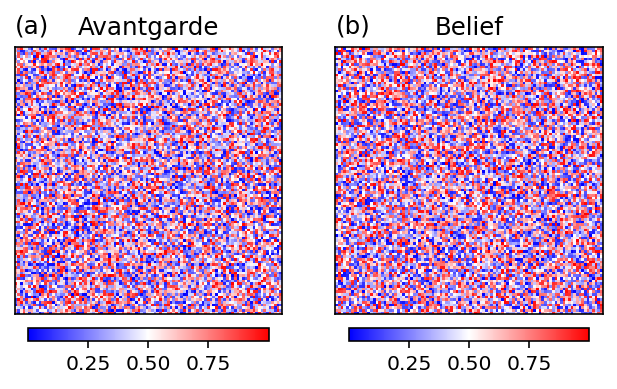

In [107]:
datalist = []
datalist.append(Grid(Avantgarde(data_uniform, startStep)))
datalist.append(Grid(Belief(data_uniform, startStep)))
titles = ["Avantgarde", "Belief"]
fig, axs = plt.subplots(1, 2)
dataindex=0
for col in range(2):
    ax = axs[col]
    colormap=cmap_continous
    grid = grid_plot(datalist[dataindex],colormap,ax)
    ax.text(-0.00, 1.05, "("+string.ascii_lowercase[dataindex]+")", transform=ax.transAxes, size=12)
    ax.title.set_text(titles[dataindex])
    dataindex+=1
    cax = ax.inset_axes([0.05,-0.1,0.9,0.05], transform=ax.transAxes)
    colorbar = fig.colorbar(grid, ax=axs[col],cax=cax, shrink=1,orientation="horizontal")
#plt.tight_layout()

plt.gcf().set_dpi(147)

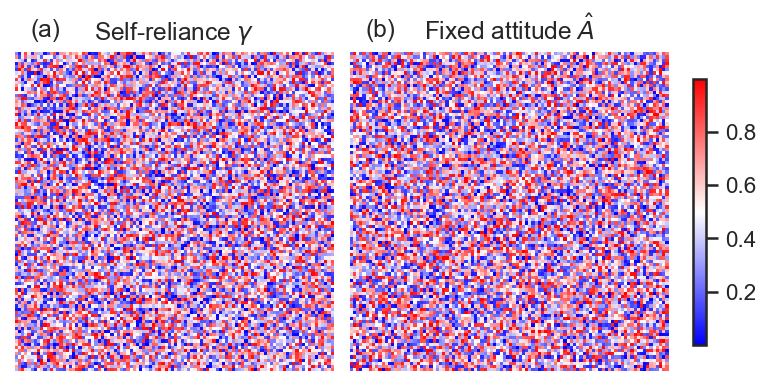

In [22]:
sns.set(style="white",
        color_codes=True,
        rc={
            'figure.figsize':(7,3),
            'figure.dpi':147
           })
fig, (imports, exports) = plt.subplots(1, 2, sharex=True)

im1 = sns.heatmap(Grid(Avantgarde(data_uniform, startStep)),
                  ax=imports,
                  square=True,
                  cbar=False,
                  cmap="bwr")
imports.set_yticklabels('')
imports.set_xticklabels('')
imports.set_ylabel('')
imports.set_xlabel('')
imports.set_title(r'Self-reliance $\gamma$', size=12);
imports.text(0.05, 1.05, "(a)", transform=imports.transAxes, size=12)

im2 = sns.heatmap(Grid(Belief(data_uniform, startStep)),
                  ax=exports,
                  square=True,
                  yticklabels=False,
                  cbar=False,
                  cmap="bwr")
exports.set_ylabel('')
exports.set_xlabel('')
exports.set_xticklabels('')
exports.set_title(r'Fixed attitude $\hat{A}$', size=12);
exports.text(0.05, 1.05, "(b)", transform=exports.transAxes, size=12)
fig.subplots_adjust(wspace=0.05, hspace=0)

mappable = im1.get_children()[0]
fig.colorbar(mappable, ax=[imports,exports], shrink=.8, orientation='vertical', pad=0.03)

dplt.show()

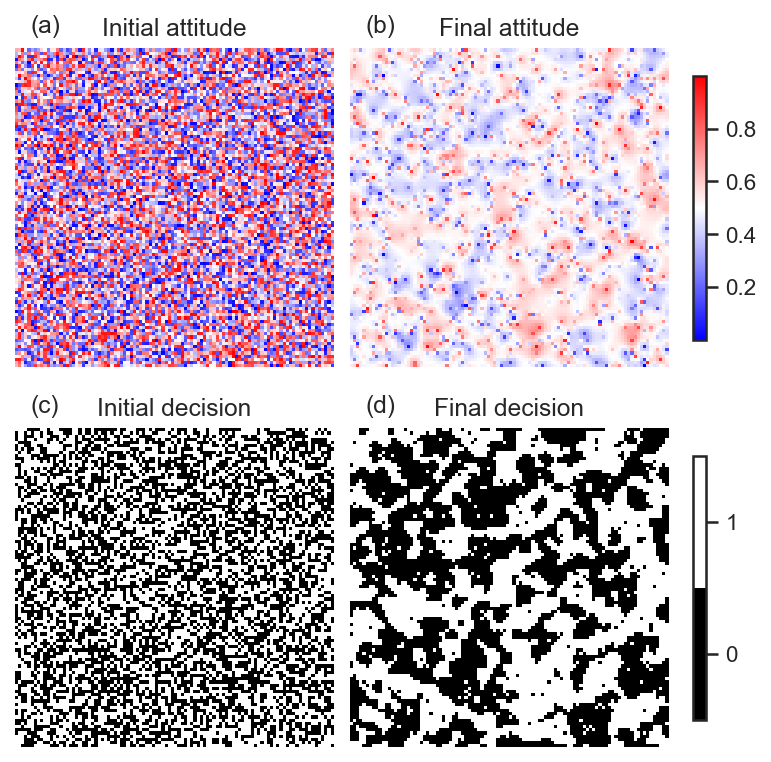

In [60]:
file_uniform = "../data/distributions/agent_data_1000steps.csv"
data_uniform = LoadSimulation(file_uniform, columns=["step", "id", "affinity", "avantgarde", "affinityGoal", "seed"])

sample_uniform = data_uniform.query("seed == 100")

colors = ((0, 0, 0), (1, 1, 1))
cmap_black_white = LinearSegmentedColormap.from_list('Custom', colors, len(colors))

sns.set(style="white", color_codes=True,
        rc={'figure.figsize':(7,6.4),
            'figure.dpi':147})

fig, (choice, decision) = plt.subplots(2, 2, sharex=True, sharey=True)

startStep = 0
endStep = 1000
im1 = sns.heatmap(Grid(Choice(sample_uniform, startStep)),
                  ax=choice[0],
                  square=True,
                  cbar=False,
                  cmap="bwr")
choice[0].set_title('Initial attitude', size=12);
choice[0].text(0.05, 1.05, "(a)", transform=choice[0].transAxes, size=12)

im2 = sns.heatmap(Grid(Choice(sample_uniform, endStep)),
                  ax=choice[1],
                  square=True,
                  yticklabels=False,
                  cbar=False,
                  cmap="bwr")
choice[1].set_title('Final attitude', size=12);
choice[1].text(0.05, 1.05, "(b)", transform=choice[1].transAxes, size=12)
#fig.subplots_adjust(wspace=0.05, hspace=0)

im3 = sns.heatmap(Grid(Choice(sample_uniform, startStep)),
                  ax=decision[0],
                  square=True,
                  yticklabels=False,
                  cbar=False,
                  cmap=cmap_black_white)
decision[0].set_title('Initial decision', size=12);
decision[0].text(0.05, 1.05, "(c)", transform=decision[0].transAxes, size=12)
#fig.subplots_adjust(wspace=0.05, hspace=0)

im4 = sns.heatmap(Grid(Choice(sample_uniform, endStep)),
                  ax=decision[1],
                  square=True,
                  yticklabels=False,
                  xticklabels=False,
                  cbar=False,
                  cmap=cmap_black_white)
decision[1].set_title('Final decision', size=12);
decision[1].text(0.05, 1.05, "(d)", transform=decision[1].transAxes, size=12)

fig.subplots_adjust(wspace=0.05, hspace=0.15)

mappable = im1.get_children()[0]
fig.colorbar(mappable, ax=choice, shrink=.8, orientation='vertical', pad=0.03)
mappable_decision = im3.get_children()[0]
colorbar = fig.colorbar(mappable_decision, ax=decision, shrink=.8, orientation='vertical', pad=0.03)
colorbar.set_ticks([0.25,0.75])
colorbar.set_ticklabels(['0', '1'])

plt.show()

In [65]:
(Choice(sample_uniform, endStep) < 0.5).sum()

4717

In [9]:
file = "../data/avantgardeGoal/100k/data_improved_avantgarde-uniform_affinity-uniform_goal-uniform_101.csv"
#file = "../data/conviction/tautest/data_avantgarde-uniform_affinity-uniform_goal-uniform_tau-10_100.csv"
file_uniform = "../data/distributions/agent_data_1000steps.csv"
data_uniform = LoadSimulation(file_uniform, columns=["step", "id", "affinity", "avantgarde", "affinityGoal", "seed"])




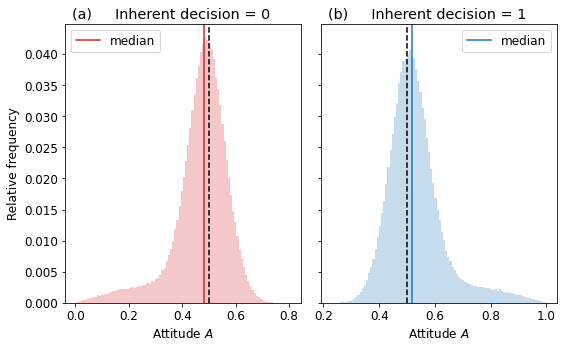

In [51]:
data_uniform_final = data_uniform.query("step == 1000")

def histogram(data, ax, color):
    histogram = ax.hist(data,bins=100,alpha=0.25,weights=np.zeros_like(data) + 1. / data.size,color=color)
    ax.axvline(0.5,ls="dashed",color="black")
    ax.axvline(np.median(data),color=color, label="median")
    return histogram

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 5), sharey=True)
histogram(data_uniform_final.query("affinityGoal < 0.5").get("affinity").values, ax0, "tab:red")
histogram(data_uniform_final.query("affinityGoal >= 0.5").get("affinity").values, ax1, "tab:blue")

ax0.set_xlabel(r"Attitude $A$")
ax1.set_xlabel(r"Attitude $A$")
ax0.set_ylabel("Relative frequency")

ax0.set_title("(a)     Inherent decision = 0     ")
ax1.set_title("(b)     Inherent decision = 1     ")

plt.tight_layout()
ax0.legend()
ax1.legend()

plt.show()

In [18]:
data_uniform_final.query("affinityGoal > 0.5").get("affinity").values

array([0.58109286, 0.55346563, 0.47736022, ..., 0.45558576, 0.44496174,
       0.45249216])

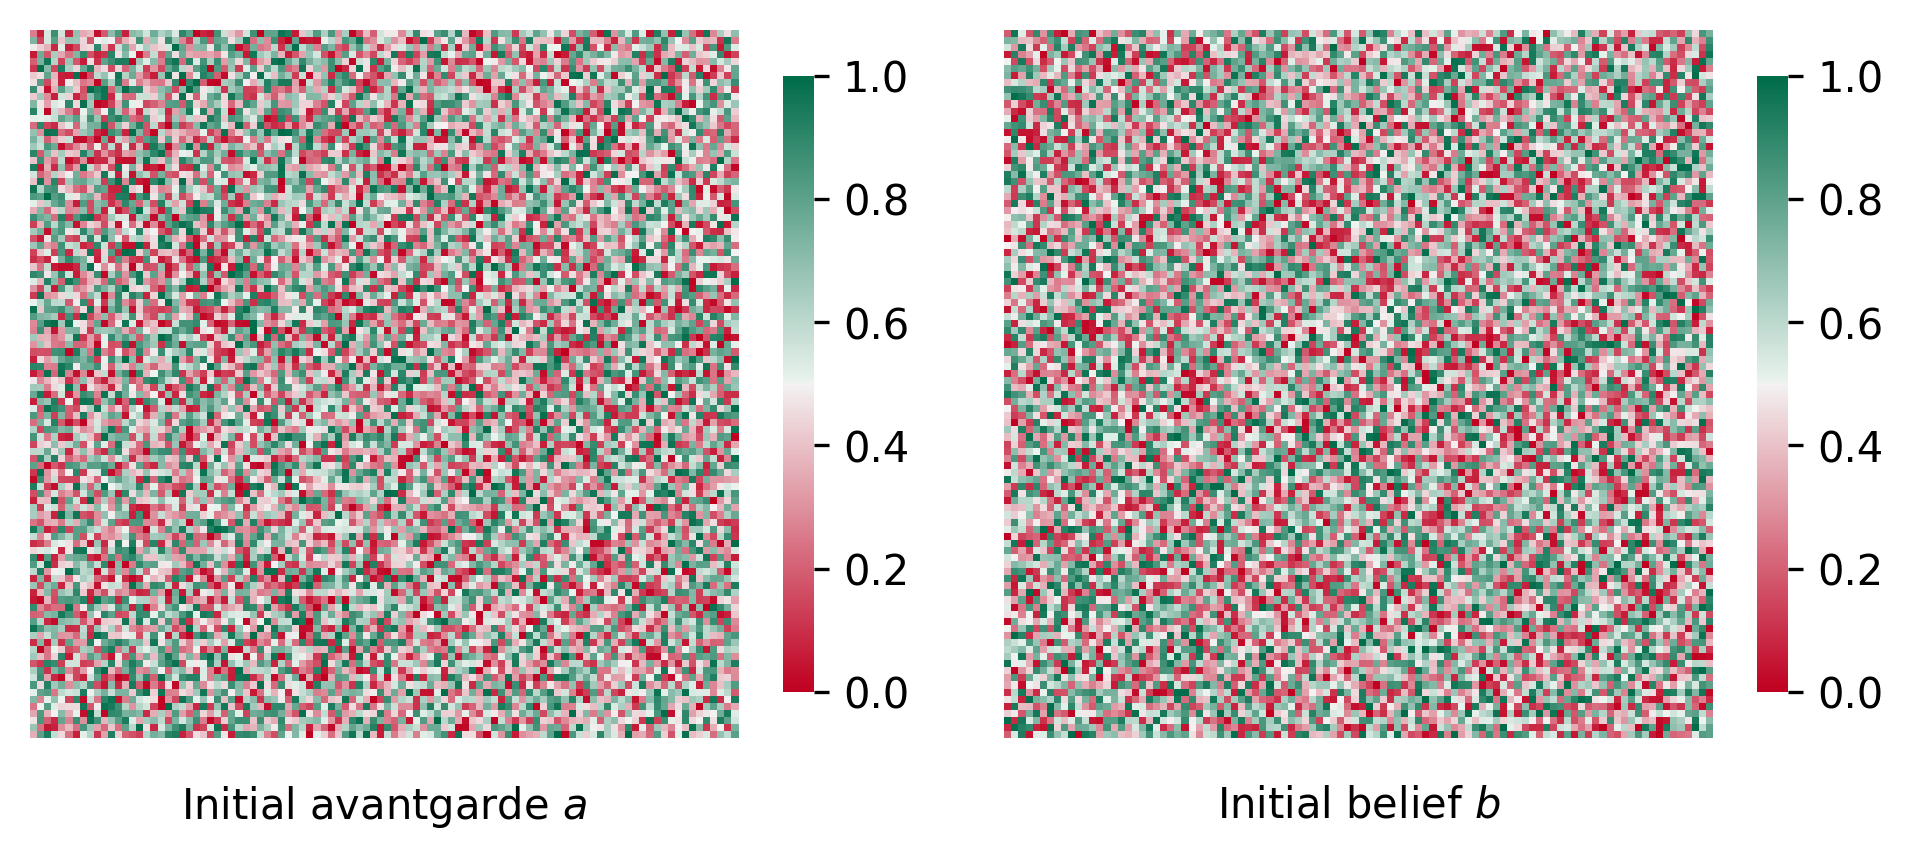

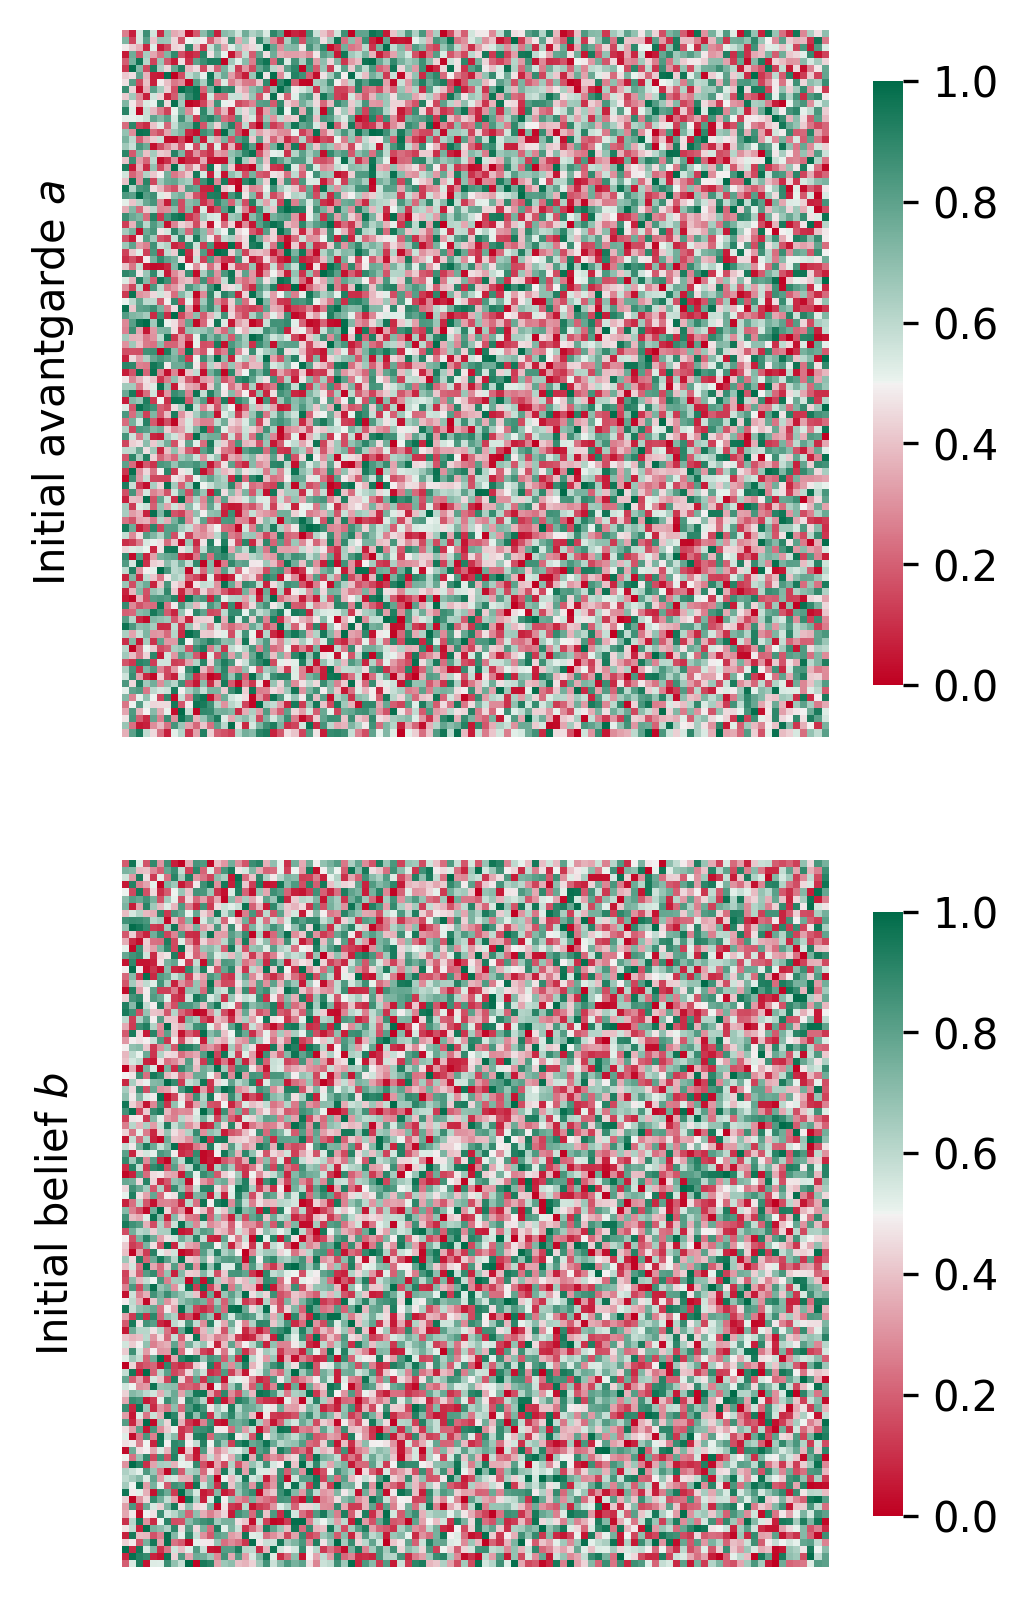

In [6]:
## create initial state grid plot
# 
# Plot 1
# ------
# Grid plot 
# a | b
# with a = affinity goal, b = avantgarde
from matplotlib.colors import LinearSegmentedColormap

file = "../data/avantgardeGoal/100k/data_improved_avantgarde-uniform_affinity-uniform_goal-uniform_100.csv"
file = "../data/conviction/tautest/data_avantgarde-uniform_affinity-uniform_goal-uniform_tau-10_100.csv"
mdata = load_data(file)

# horizontal
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 3.4))
sns.heatmap(ax=axes.flatten()[0], data=gridAvant(mdata, 0, 100),  
            vmin=0., vmax=1.0, cmap=cmap_green_red, square=True, cbar_kws={"shrink": .8})
sns.heatmap(ax=axes.flatten()[1], data=gridGoal(mdata, 0, 100), 
            vmin=0., vmax=1.0, cmap=cmap_green_red, square=True, cbar_kws={"shrink": .8})

for ax in axes.flatten():
    ax.tick_params(left=False, bottom=False, top=False)
    ax.set(xticklabels=[], yticklabels=[])

axes.flatten()[0].set_xlabel(r"Initial avantgarde $a$")
axes.flatten()[1].set_xlabel(r"Initial belief $b$")

plt.subplots_adjust(wspace=0.1, hspace=0.1)

# vertical
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(3.8, 7))
sns.heatmap(ax=axes.flatten()[0], data=gridAvant(mdata, 0, 100),  
            vmin=0., vmax=1.0, cmap=cmap_green_red, square=True, cbar_kws={"shrink": .8})
sns.heatmap(ax=axes.flatten()[1], data=gridGoal(mdata, 0, 100), 
            vmin=0., vmax=1.0, cmap=cmap_green_red, square=True, cbar_kws={"shrink": .8})

for ax in axes.flatten():
    ax.tick_params(left=False, bottom=False, top=False)
    ax.set(xticklabels=[], yticklabels=[])

axes.flatten()[0].set_ylabel(r"Initial avantgarde $a$")
axes.flatten()[1].set_ylabel(r"Initial belief $b$")

plt.subplots_adjust(wspace=0.1, hspace=0.1)

plt.show()

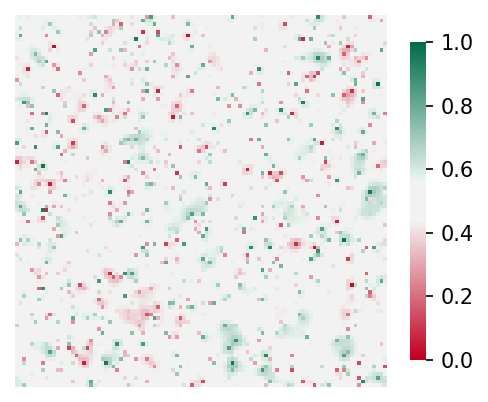

In [507]:
## create color gap plot
# 


# horizontal
fig = plt.figure(figsize=(4, 3.5))
sns.heatmap(data=grid(mdata, finalStep, 100),  
            vmin=0., vmax=1.0, cmap=cmap_green_red_gap, square=True, cbar_kws={"shrink": .8})

ax = fig.gca()

ax.tick_params(left=False, bottom=False, top=False)
ax.set(xticklabels=[], yticklabels=[])

axes.flatten()[0].set_xlabel(r"Initial avantgarde $a$")
axes.flatten()[1].set_xlabel(r"Initial conviction $c$")

plt.subplots_adjust(wspace=0.1, hspace=0.1)

plt.show()

In [7]:
class ChebyshevNeighbours:
    def __init__(self, i, j, r, N):
        self.N = N
        self.x = (i - r - 1) % N
        self.y = (j - r) % N
        self.i = i
        self.j = j
        self.r = r
        self.xcount = 0
        self.ycount = 1

    def __iter__(self):
        return self

    def __next__(self): # Python 2: def next(self)
        self.xcount += 1
        self.x += 1
        self.x = self.x % self.N
        
        if self.xcount > self.r * 2 + 1:
            self.xcount = 1
            self.ycount += 1
            self.x = (self.i - self.r) % self.N
            self.y += 1
            self.y = self.y % self.N
        
        if self.ycount > self.r * 2 + 1:
            raise StopIteration
            
        if self.x == self.i and self.y == self.j:
            return self.__next__()
        
        return (self.x, self.y)

In [8]:
def IndexToId(index):
    return index + 1

def IdToIndex(_id):
    return _id - 1

def IndexToCoords(index, Nx):
    coords = np.zeros(2, dtype='int32')
    coords[1] = int(index % Nx)
    coords[0] = int(index / Nx)
    return coords

def CoordsToIndex(coords, Nx):
    return int(coords[0] * Nx + coords[1])

def neighbours(data, _id):
    N = data["id"].max()
    Nx = int(np.sqrt(N))
    idx = IdToIndex(_id)
    
    rowNeighbours = [-1, -1, -1, 0, 0, 1, 1, 1]
    columnNeighbours = [-1, 0, 1, -1, 1, -1, 0, 1]
    
    coords = IndexToCoords(idx, Nx)
    nn_idx = []
    for r, c in zip(rowNeighbours, columnNeighbours):
        index = CoordsToIndex((coords + np.array([r, c])) % Nx, Nx)
        nn_idx.append(index)
            
    nn_ids = [IndexToId(k) for k in nn_idx]
    
    return data[data["id"].isin(nn_ids)]

# tests
testArray = np.array([9, 9])
result = np.all(IndexToCoords(CoordsToIndex(testArray, 10), 10) == testArray)
msg = 'was successful' if result else 'failed'
print("Function invertion test " + msg)

Function invertion test was successful


In [9]:
# create array with all neighbour indices
# ---------------------------------------
radius = 1 # chebyshev neighbour radius
size = 100
n_agents = size * size

all_neighbour_ids = []

for k in range(n_agents):
    ci, cj = IndexToCoords(k, size)
    _ids = np.array([IndexToId(CoordsToIndex(n, size)) 
                     for n in ChebyshevNeighbours(ci, cj, radius, size)])

    all_neighbour_ids.append(_ids)

all_neighbour_ids = np.array(all_neighbour_ids)
all_neighbour_ids.shape

(10000, 8)

In [10]:
file_uniform = "../data/distributions/agent_data_1000steps.csv"
sample = (LoadSimulation(file_uniform, columns=["step", "id", "affinity", "avantgarde", "affinityGoal", "seed"])
          .query("step == 1000"))

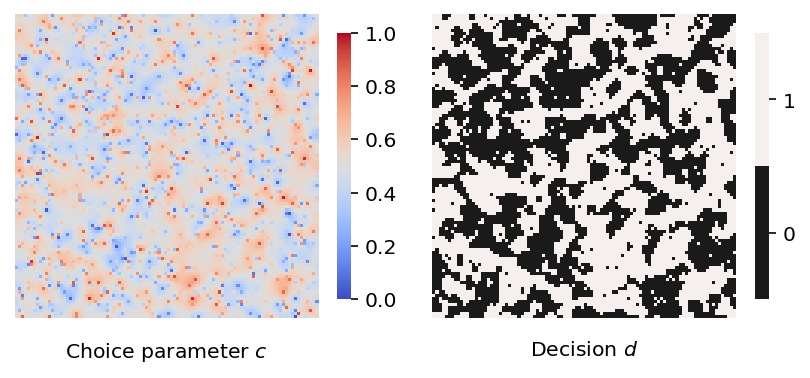

In [15]:
ShowState(Grid(Choice(sample.query("seed == 100"), 1000)))

In [11]:
def NeighbourhoodUniformity(neighbourhood, belief):
    n, _ = neighbourhood.shape
    n_pro = np.sum(Belief(neighbourhood) >= 0.5)
    n_con = n - n_pro
    d_agent = belief >= 0.5
    factor = d_agent + (1 - d_agent) * (-1)
    return (n_pro - n_con) / n * factor

def AvantgardeValue(data):
    return Avantgarde(data).item(0)

def BeliefValue(data):
    return Belief(data).item(0)

def NeighbourhoodUniformityCore(data, _all_neighbours):
    belief = BeliefValue(data)
    agent_id = int(data.get("id").item(0))
    neighbours = _all_neighbours[IdToIndex(agent_id)]
    return NeighbourhoodUniformity(neighbours, belief)

def Satisfaction(data):
    inherent_decision = Belief(data) >= 0.5
    decision = Choice(data) >= 0.5
    return int(inherent_decision == decision)

nn_df = sample.copy(deep=True)

# calculate neighbourhood uniformity
# ---------------------------------------
radius = 1 # chebyshev neighbour radius
n_agents = size * size

nn_columns = ["avantgarde", "uniformity", "satisfaction"]
nn_data = []
#agent_ids = np.array([IndexToId(k) for k in range(n_agents)[:2]])

uniformity_label = "uniformity"
satisfaction_label = "satisfaction"
nn_df[satisfaction_label] = np.nan
nn_df[uniformity_label] = np.nan

for s in range(100, 200):
    print("Working on file with seed = %d" %s)
    agents = nn_df.query("seed == @s") #.query("id in @agent_ids")
    all_neighbours = [agents[agents["id"].isin(ids)] for ids in all_neighbour_ids[:]]
    _u = (agents.apply(NeighbourhoodUniformityCore, args=(all_neighbours,), axis=1)
          .rename(uniformity_label, inplace=True))
    _s = (agents.apply(Satisfaction, axis=1)
          .rename(satisfaction_label, inplace=True))
    nn_df.update(_s)
    nn_df.update(_u)
          
#ShowState(Grid(Choice(test)))

Working on file with seed = 100
Working on file with seed = 101
Working on file with seed = 102
Working on file with seed = 103
Working on file with seed = 104
Working on file with seed = 105
Working on file with seed = 106
Working on file with seed = 107
Working on file with seed = 108
Working on file with seed = 109
Working on file with seed = 110
Working on file with seed = 111
Working on file with seed = 112
Working on file with seed = 113
Working on file with seed = 114
Working on file with seed = 115
Working on file with seed = 116
Working on file with seed = 117
Working on file with seed = 118
Working on file with seed = 119
Working on file with seed = 120
Working on file with seed = 121
Working on file with seed = 122
Working on file with seed = 123
Working on file with seed = 124
Working on file with seed = 125
Working on file with seed = 126
Working on file with seed = 127
Working on file with seed = 128
Working on file with seed = 129
Working on file with seed = 130
Working 

In [259]:
nn_df = sample.copy(deep=True)
agents = nn_df.query("seed == 100")
agents

step     id  affinity  avantgarde  affinityGoal  seed
10000  1000      1  0.537423    0.260125      0.190313   100
10001  1000      2  0.581093    0.067193      0.967600   100
10002  1000      3  0.553466    0.545968      0.526845   100
10003  1000      4  0.324524    0.868194      0.172707   100
10004  1000      5  0.477360    0.557837      0.893169   100
...     ...    ...       ...         ...           ...   ...
19995  1000   9996  0.446953    0.546545      0.231977   100
19996  1000   9997  0.459556    0.229368      0.247023   100
19997  1000   9998  0.506616    0.685058      0.530775   100
19998  1000   9999  0.526499    0.590378      0.821052   100
19999  1000  10000  0.570258    0.808298      0.804085   100

[10000 rows x 6 columns]

In [12]:
%%timeit -n6 -r6
agents.query("id in @all_neighbour_ids[0]")

The slowest run took 8.21 times longer than the fastest. This could mean that an intermediate result is being cached.
62.4 ms ± 73.8 ms per loop (mean ± std. dev. of 6 runs, 6 loops each)


In [13]:
%%timeit -n6 -r6
all_neighbours = []
for _neighbour_ids in all_neighbour_ids[:100]:
    all_neighbours.append(agents.query("id in @_neighbour_ids"))

200 ms ± 7.16 ms per loop (mean ± std. dev. of 6 runs, 6 loops each)


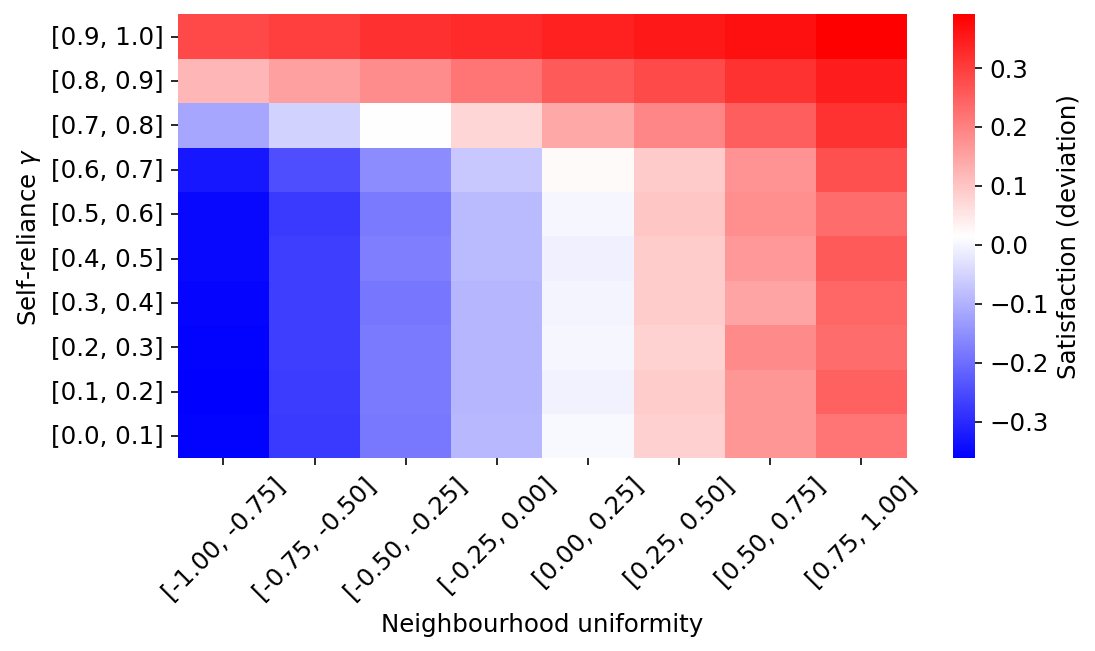

In [31]:
# visualize neighbourhood uniformity 
# impact on satisfaction
# ----------------------------------
nn_plot_df = nn_df.copy(deep=True)

fig, ax = plt.subplots(figsize=(8, 4))

xlabelfunc = lambda x: f"[{x.left:.2f}, {x.right:.2f}]"
ylabelfunc = lambda x: f"[{x.left:.1f}, {x.right:.1f}]"

bins = np.arange(-1, 1.1, 2./8)
bins_avantgarde = np.arange(0, 1.1, 0.1)
cuts = pd.DataFrame({"Neighbourhood uniformity": pd.cut(nn_plot_df["uniformity"], bins), 
                     r"Self-reliance $\gamma$" : pd.cut(nn_plot_df["avantgarde"], bins_avantgarde)})


mean_satisfaction = nn_plot_df["satisfaction"].mean()

means = (nn_plot_df.drop("avantgarde", axis=1)
         .drop("uniformity", axis=1)
         .join(cuts).groupby( list(cuts) )
         .mean())
means = means.unstack(level = 0)

# Reverse the order of the rows as the heatmap will print from top to bottom.
means = means.iloc[::-1]
    
g = sns.heatmap(means["satisfaction"] - mean_satisfaction, annot=False, fmt=".2f", ax=ax, cmap="bwr",
            cbar_kws={'label': r'Satisfaction (deviation)', "shrink": 1.},
            xticklabels = means['satisfaction'].columns.map(xlabelfunc), 
            yticklabels = means['satisfaction'].index.map(ylabelfunc))

g.set_xticklabels(g.get_xticklabels(), rotation=45)

plt.gcf().set_dpi(147)
plt.show()

In [315]:
mean_satisfaction

0.592208

In [208]:
## 2d histogram for cluster analysis
# -----------------------------------
def Satisfaction(data):
    goal = data.get("affinityGoal")
    actual = data.get("affinity")
    return int((goal >= 0.5) == (actual >= 0.5))



def CreateClusterData(data, r, p):
    finalState = data.query("step == 180")
    size = 100
    data = []
    
    #posClusterIndices = [CoordsToIndex(n, size) for n in ChebyshevNeighbours(0, 0, r, size)]
    #posClusterAgents = finalState.query("id in @posClusterIndices")
    
    for j in range(0, finalState.shape[0] - 1): #posClusterIndices:
        jId = j + 1
        agent = finalState.query("id == @jId")
        if agent.empty:
            print(agent)
            
        s = Satisfaction(agent)
        
        ci, cj = IndexToCoords(j, size)
        
        for rn in [1, 2, 3, 4]:
            jjIds = np.array([CoordsToIndex(n, size) for n in ChebyshevNeighbours(ci, cj, rn, size)]) + 1

            u = NeighbourhoodUniformity(finalState.query("id in @jjIds"), agent.get("affinityGoal").values[0])
        
            data.append([agent.get("avantgarde").values[0], np.inf, rn, u, "unknown", s])
    
    # calculate average bubble affinity
    #negClusterIndices = [CoordsToIndex(n, size) for n in ChebyshevNeighbours(50, 0, r, size)]
    #negClusterAgents = finalState.query("id in @negClusterIndices")
    #
    #for j in negClusterIndices:
    #    agent = finalState.query("id == @j")
    #    s = Satisfaction(agent)
    #   
    #    ci, cj = IndexToCoords(j, size)
    #    rn = 1
    #    
    #    jj = [CoordsToIndex(n, size) for n in ChebyshevNeighbours(ci, cj, rn, size)]
    #    u = NeighbourhoodUniformity(finalState.query("id in @jj"), agent.get("affinityGoal").values[0])
    #    
    #    data.append([agent.get("avantgarde").values[0], r, rn, u, "negative", s])
    
    return data


# create data
COLUMNS = ["Avantgarde", "Cluster radius", "Neighbourhood radius", "Neighbourhood uniformity", "Type", "Satisfaction"]
clusterData = pd.DataFrame(columns=COLUMNS)

radii = (10, 5, 3, 1)
probabilities = (1.0, 0.9, 0.75, 0.5)
seeds = range(100, 110, 1)

#for r in radii:
#    for p in probabilities:
#        for seed in seeds:
#            path = "../data/conviction/clusters/"
#            #file = f"{path}data_p-{int(p * 100)}_cr-{r}_avantgarde-uniform_affinity-uniform_goal-uniform{seed}.csv"
path = f"../data/avantgardeGoal/100k/data_improved_avantgarde-uniform_affinity-uniform_goal-uniform_%3d.csv"
pathCluster = f"../data/conviction/clusters/data_improved_avantgarde-uniform_affinity-uniform_goal-uniform_%3d.csv"
files = [path % k for k in range(100, 110, 1)]

for file in files:
    try:
        data = load_data(file)
        newData = CreateClusterData(data, 25, 0)
        clusterData = pd.concat([clusterData, pd.DataFrame(newData, columns=COLUMNS)], ignore_index=True)
    except Exception as ex:
        raise ex

clusterData
# visualize

Avantgarde Cluster radius Neighbourhood radius  \
0        0.260125            inf                    1   
1        0.260125            inf                    2   
2        0.260125            inf                    3   
3        0.260125            inf                    4   
4        0.067193            inf                    1   
...           ...            ...                  ...   
399955    0.60419            inf                    4   
399956   0.162396            inf                    1   
399957   0.162396            inf                    2   
399958   0.162396            inf                    3   
399959   0.162396            inf                    4   

       Neighbourhood uniformity     Type Satisfaction  
0                         -0.75  unknown            0  
1                          -0.5  unknown            0  
2                     -0.291667  unknown            0  
3                        -0.175  unknown            0  
4                          0.25  unknown            1  
...                         ...      ...          ...  
399955                   -0.175  unknown            0  
399956                     -0.5  unknown            0  
399957                    -0.25  unknown            0  
399958                -0.166667  unknown            0  
399959                    -0.15  unknown            0  

[399960 rows x 6 columns]

In [968]:
np.arange(-1, 1, 2./8)

array([-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75])

Text(0, 0.5, 'Neighbourhood uniformity')

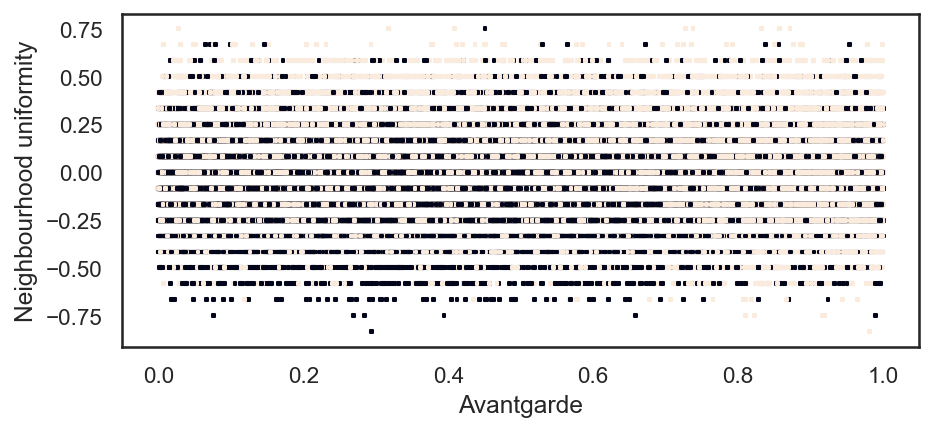

In [209]:
data = clusterData.query("`Neighbourhood radius` == 2")

plt.figure()
plt.scatter(data["Avantgarde"], data["Neighbourhood uniformity"], marker="s",
            s=2, c=data["Satisfaction"])

plt.xlabel("Avantgarde")
plt.ylabel("Neighbourhood uniformity")

C:\Users\hoedtke\AppData\Local\Temp/ipykernel_27780/1191682297.py:14: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  means = data.drop("Avantgarde", axis=1).drop("Neighbourhood uniformity", axis=1).join(cuts).groupby( list(cuts) ).mean()
C:\Users\hoedtke\AppData\Local\Temp/ipykernel_27780/1191682297.py:14: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  means = data.drop("Avantgarde", axis=1).drop("Neighbourhood uniformity", axis=1).join(cuts).groupby( list(cuts) ).mean()


Text(0.5, 0.9, 'r = 2')

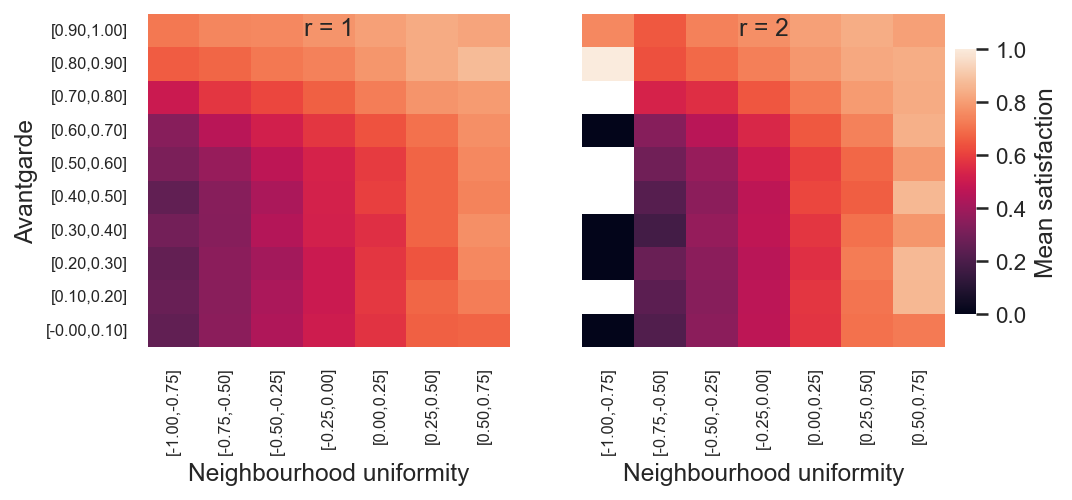

In [210]:
fig, ax = plt.subplots(1, 2, sharex=False, sharey=True)

labelfunc = lambda x: f"[{x.left:.2f},{x.right:.2f}]"

cbar_ax = fig.add_axes([0.91, 0.2, 0.02, 0.6])

for axis, i in zip(ax.flatten(), range(1, 3, 1)):
    nCut = [8, 10]
    bins = np.arange(-1, 1, 2./8)
    data = clusterData.query("`Neighbourhood radius` == @i")
    cuts = pd.DataFrame({"Neighbourhood uniformity": pd.cut(data["Neighbourhood uniformity"], bins), "Avantgarde" : pd.cut(data["Avantgarde"], 10),
})

    means = data.drop("Avantgarde", axis=1).drop("Neighbourhood uniformity", axis=1).join(cuts).groupby( list(cuts) ).mean()
    means = means.unstack(level = 0)

    # Reverse the order of the rows as the heatmap will print from top to bottom.
    means = means.iloc[::-1]
    
    sns.heatmap(means["Satisfaction"], annot=False, fmt=".2f", cbar=i==1, cbar_ax=cbar_ax, vmin=0.0, vmax=1, ax=axis,
                cbar_kws={'label': 'Mean satisfaction'}, 
                xticklabels = means['Satisfaction'].columns.map(labelfunc), 
                yticklabels = means['Satisfaction'].index.map(labelfunc))

ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize=8)
ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=8)
ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=8)
#ax[2].set_xticklabels(ax[2].get_xticklabels(), fontsize=8)
ax[1].set_ylabel("")
#ax[2].set_ylabel("")

ax[0].set_title("r = 1", y=0.9)
ax[1].set_title("r = 2", y=0.9)

    # means['Satisfaction']

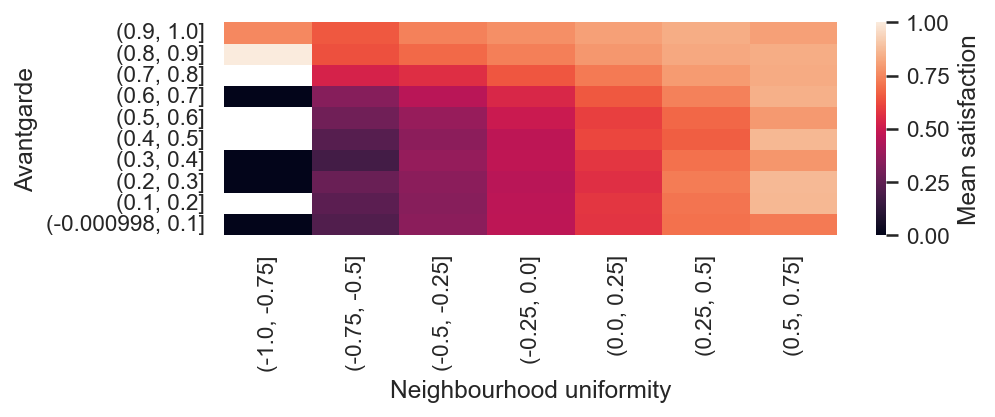

In [214]:
r = 1
# data = pd.pivot_table(means["Satisfaction"],
#                       index="AvantgardeBin", 
#                       columns="Neighbourhood uniformityBin", 
#                       values="Satisfaction", aggfunc=np.mean)

plt.figure()
sns.heatmap(means["Satisfaction"], annot=False, fmt=".2f", cbar=True, vmin=0.0, vmax=1,
            cbar_kws={'label': 'Mean satisfaction'})#,
            #xticklabels = means['Satisfaction'].columns.map(lambda x : np.round(x.left, 1)),
            #yticklabels = means['Satisfaction'].index.map(lambda x : np.abs(np.round(x.left, 2))))

plt.tight_layout()
plt.show()

In [347]:
from scipy.stats import sem

index = 1
saturationStep = 140
size = 50

def AnalyzeBubbleFile(file):
    data = load_data(file)
    
    # calculate average overall affinity
    a = avantgarde(data, saturationStep)
    overallAffinity = (a.mean(), sem(a))
    
    bubbleIndices = [CoordsToIndex(n, size) for n in ChebyshevNeighbours(0, 1, 2, size)]
    bubbleAgents = data.query("id in @bubbleIndices")
    
    # calculate average bubble affinity
    a = avantgarde(bubbleAgents, saturationStep)
    bubbleAffinity = (a.mean(), sem(a))
    
    # calculate overall satisfaction
    s = Satisfaction(data, saturationStep)
    overallSatisfaction = (s.mean(), sem(s))
    
    # calculate satisfaction bubble
    s = Satisfaction(bubbleAgents, saturationStep)
    bubbleSatisfaction = (s.mean(), sem(s))
    
    
    return overallAffinity, bubbleAffinity, overallSatisfaction, bubbleSatisfaction

def AnalyzeBubble(radius):
    path = "../data/avantgardeGoal/100k/bubble/"
    
    oA, bA, oS, bS = [], [], [], []
    for seed in range(100, 110):
        file = "data_r-%1d_avantgarde-uniform_affinity-uniform_goal-normal-0.6-0.2_%3d.csv" % (radius, seed)
        _oA, _bA, _oS, _bS = AnalyzeBubbleFile(path + file)
        oA.append(unumpy.uarray(*_oA))
        oS.append(unumpy.uarray(*_oS))
        bA.append(unumpy.uarray(*_bA))
        bS.append(unumpy.uarray(*_bS))
        
    return np.sum(oA) / len(oA), np.sum(bA) / len(bA), np.sum(oS) / len(oS), np.sum(bS) / len(bS)


def CD(data):
    goal = data.get("affinityGoal")
    actual = data.get("affinity")
    return np.sum((goal >= 0.5) == (actual >= 0.5)) * 1.0 /goal.size#abs(goal - actual)

def CreateClusterData(data, r, p, a):
    finalState = data.query("step == 200")
    size = 100
    posClusterIndices = np.array([CoordsToIndex(n, size) for n in ChebyshevNeighbours(0, 0, r, size)]) + 1
    posClusterAgents = finalState.query("id in @posClusterIndices")
    #print(posClusterAgents)
    pcs = CD(posClusterAgents.query("avantgarde >= @a")).mean()
    
    # calculate average bubble affinity
    negClusterIndices = np.array([CoordsToIndex(n, size) for n in ChebyshevNeighbours(50, 0, r, size)]) + 1
    negClusterAgents = finalState.query("id in @negClusterIndices")
    #print(negClusterAgents)
    ncs = CD(negClusterAgents.query("avantgarde >= @a")).mean()
    
    return [[a, r, p, "positive", pcs], [a, r, p, "negative", ncs]]

COLUMNS = ["Avantgarde", "Radius", "Cluster uniformity", "Type", "Satisfaction"]
clusterData = pd.DataFrame(columns=COLUMNS)

avantgardeThresholds = (0.0, 0.5, 0.7, 0.8)
radii = (10, 5, 3, 1)
probabilities = (1.0, 0.9, 0.75, 0.5)
seeds = range(100, 111, 1)

for r in radii:
    for p in probabilities:
        for seed in seeds:
            path = "../data/conviction/clusters/"
            file = f"{path}data_p-{int(p * 100)}_cr-{r}_avantgarde-uniform_affinity-uniform_goal-uniform{seed}.csv"
            try:# print(file)
                data = load_data(file)
                for a in avantgardeThresholds:
                    newData = CreateClusterData(data, r, p, a)
                    clusterData = pd.concat([clusterData, pd.DataFrame(newData, columns=COLUMNS)], ignore_index=True)
            except Exception as ex:
                continue

clusterData

C:\Users\hoedtke\AppData\Local\Temp/ipykernel_20264/2257395180.py:49: RuntimeWarning: invalid value encountered in double_scalars
  return np.sum((goal >= 0.5) == (actual >= 0.5)) * 1.0 /goal.size#abs(goal - actual)
C:\Users\hoedtke\AppData\Local\Temp/ipykernel_20264/2257395180.py:49: RuntimeWarning: invalid value encountered in double_scalars
  return np.sum((goal >= 0.5) == (actual >= 0.5)) * 1.0 /goal.size#abs(goal - actual)
C:\Users\hoedtke\AppData\Local\Temp/ipykernel_20264/2257395180.py:49: RuntimeWarning: invalid value encountered in double_scalars
  return np.sum((goal >= 0.5) == (actual >= 0.5)) * 1.0 /goal.size#abs(goal - actual)
C:\Users\hoedtke\AppData\Local\Temp/ipykernel_20264/2257395180.py:49: RuntimeWarning: invalid value encountered in double_scalars
  return np.sum((goal >= 0.5) == (actual >= 0.5)) * 1.0 /goal.size#abs(goal - actual)
C:\Users\hoedtke\AppData\Local\Temp/ipykernel_20264/2257395180.py:49: RuntimeWarning: invalid value encountered in double_scalars
  retu

Avantgarde Radius Cluster uniformity      Type Satisfaction
0           0.0     10                1.0  positive     0.959091
1           0.0     10                1.0  negative     0.972789
2           0.5     10                1.0  positive     0.966507
3           0.5     10                1.0  negative     0.991071
4           0.7     10                1.0  positive     0.966102
...         ...    ...                ...       ...          ...
1403        0.5      1                0.5  negative          1.0
1404        0.7      1                0.5  positive          1.0
1405        0.7      1                0.5  negative          1.0
1406        0.8      1                0.5  positive          1.0
1407        0.8      1                0.5  negative          1.0

[1408 rows x 5 columns]

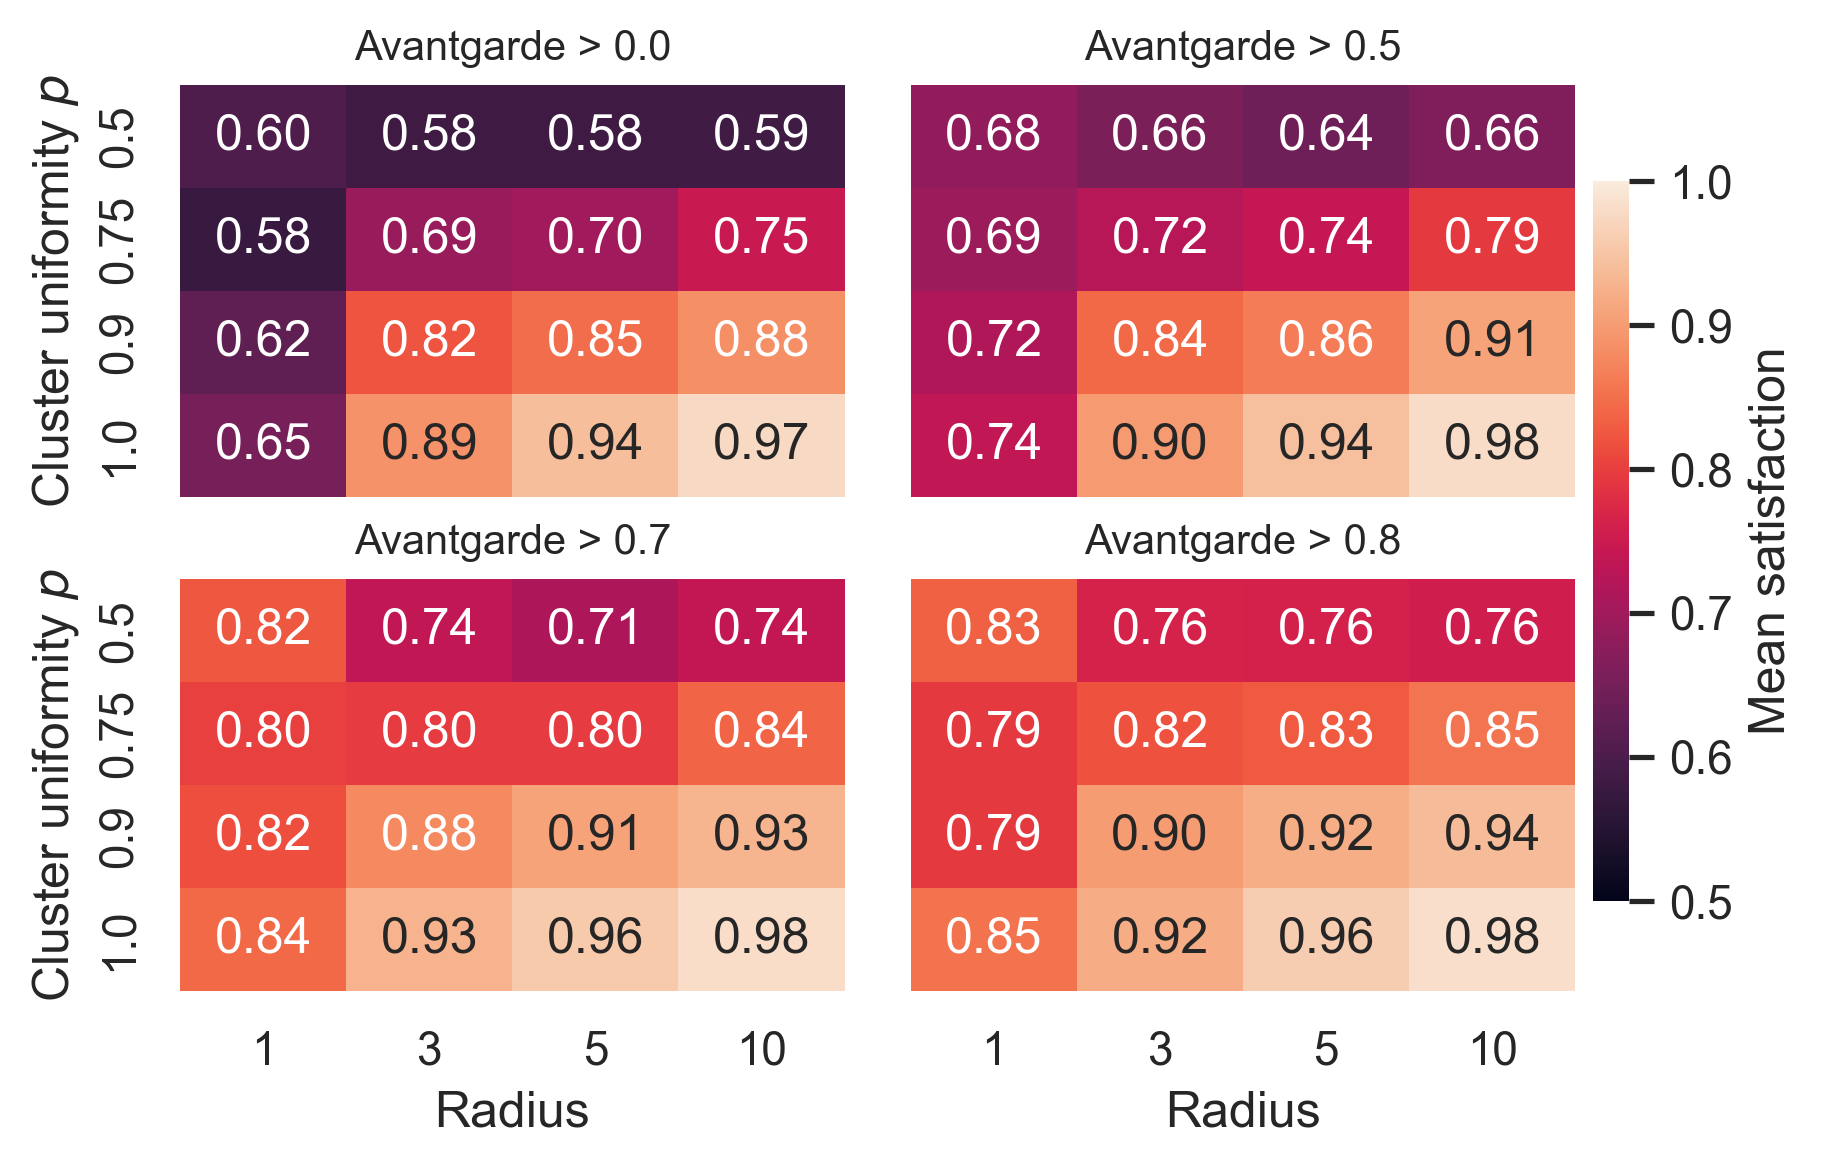

In [403]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
cbar_ax = fig.add_axes([.91, .2, .02, .6])

for i, ax in enumerate(axes.flatten()):
    
    a = avantgardeThresholds[i]
    data = pd.pivot_table(clusterData.query("Avantgarde==@a"),
                          index="Cluster uniformity", columns="Radius", values="Satisfaction", aggfunc=np.mean)
    ax.set_title(f"Avantgarde > {a:.1f}", fontsize=10)
    sns.heatmap(data, annot=True, fmt=".2f", ax=ax, cbar=i==0, cbar_ax=None if i else cbar_ax, vmin=0.5, vmax=1,
               cbar_kws={'label': 'Mean satisfaction'})

axes[0, 1].set_ylabel(None)
axes[0, 0].set_xlabel(None)
axes[1, 1].set_ylabel(None)
axes[0, 1].set_xlabel(None)
axes[0, 0].set_ylabel(r"Cluster uniformity $p$")
axes[1, 0].set_ylabel(r"Cluster uniformity $p$")

plt.subplots_adjust(wspace=0.1, hspace=0.2)
plt.show()

C:\Users\hoedtke\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.7686274509803922, 0.3058823529411765, 0.3215686274509804)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
C:\Users\hoedtke\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.7686274509803922, 0.3058823529411765, 0.3215686274509804)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
C:\Users\hoedtke\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.7686274509803922, 0.3058823529411765, 0.3215686274509804)) for an unfille

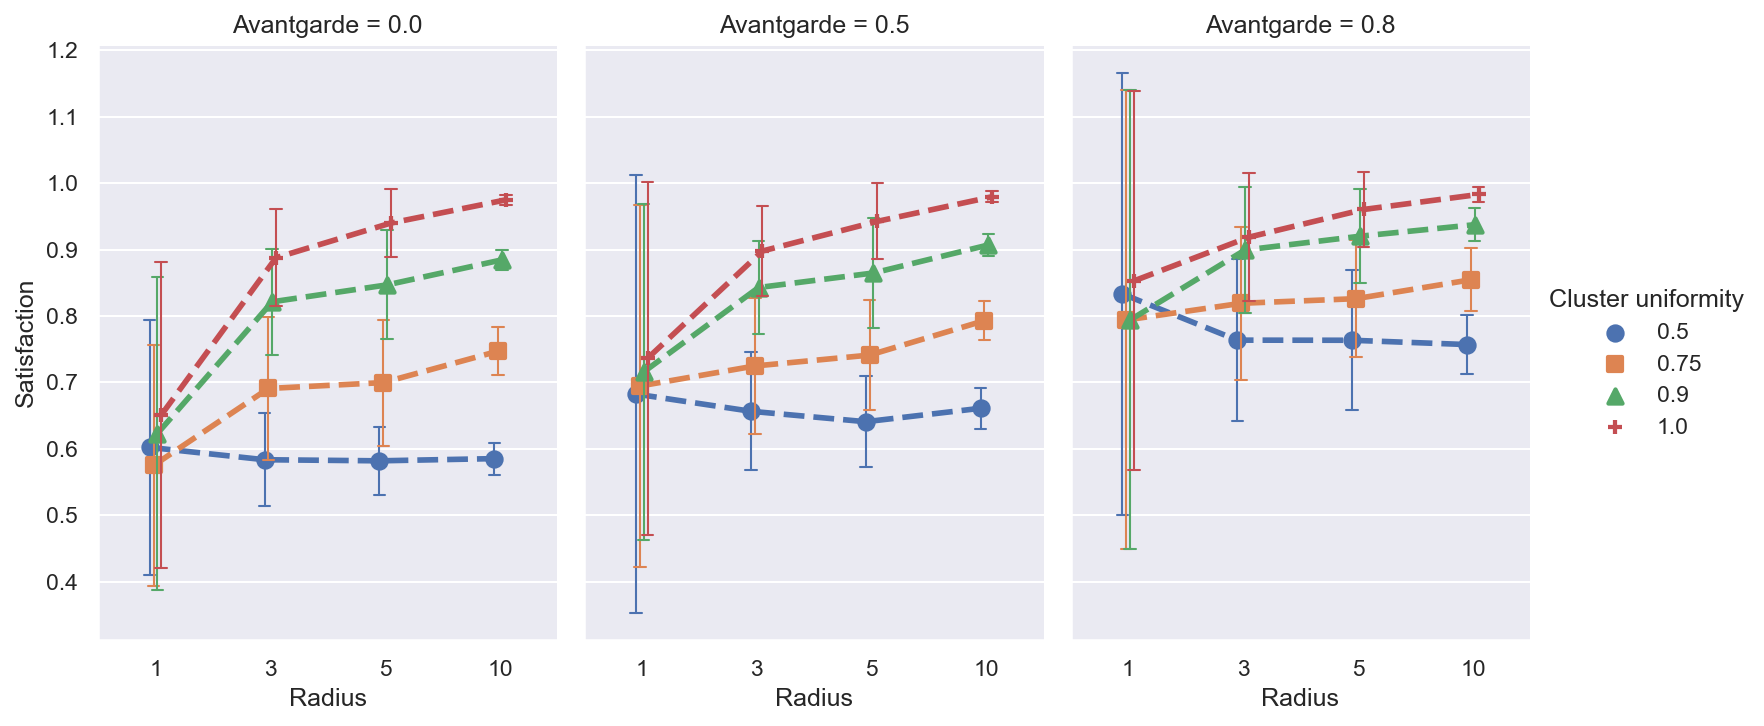

In [349]:
## Plot cluster analysis
# ----------------------

sns.catplot(
    data=clusterData.query("Avantgarde != 0.7"),
    x="Radius", y="Satisfaction",
    col="Avantgarde", hue="Cluster uniformity", dodge=True, markers=["o", "s", "^", "+"],
    errwidth=1, capsize=0.1, ci="sd", aspect=.7,
    kind="point", linestyles="--", palette=sns.color_palette("deep")
)

plt.show()

Total satisfaction: 0.7500


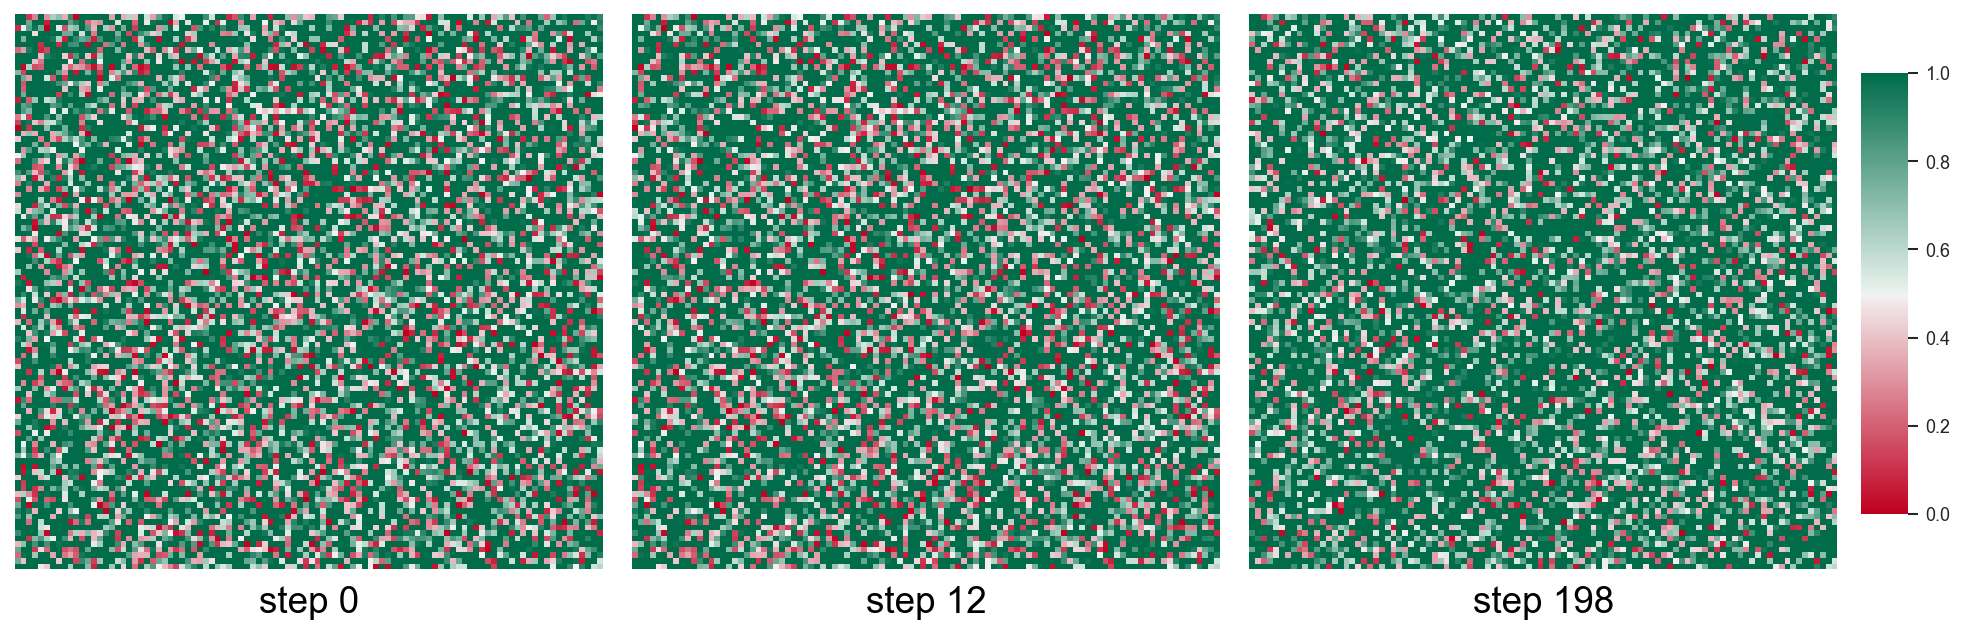

In [132]:
# Estimation of agent satisfaction
# --------------------------------

def Satisfaction(data, step):
    threshold = .5
    gap = 0.0
    
    size = data.query('step == 0').get('id').values.size

    affinityGoalGreaterThanThreshold = affinityGoal(data, step) > threshold
    #Ahat = np.sign(avantgarde(data, step)) * 0.5 + 0.5
    affinityGreaterThanThreshold = affinity(data, step) > threshold

    return affinityGreaterThanThreshold == affinityGoalGreaterThanThreshold

def AdjustedSatisfaction(data, step):
    """Consider weighting by avantgarde factor."""
    s = Satisfaction(data, step)
    N = data.query('step == 0').get('id').values.size
    a = avantgarde(data, step)
    return s * a +  (1-a)
    

def TotalSatisfaction(data, step):
    N = data.query('step == 0').get('id').values.size
    return Satisfaction(data, step).sum() / N

def TotalAdjustedSatisfaction(data, step):
    N = data.query('step == 0').get('id').values.size
    return AdjustedSatisfaction(data, step).sum() / N

print("Total satisfaction: %.4f" % TotalAdjustedSatisfaction(dtest, 4))

fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharex=True, sharey=True)

steps = (0, 12, 198)

cbar_ax = fig.add_axes([.91, .2, .02, .6])
for i, ax in enumerate(axes.flatten()):
    step = steps[i]
    sns.heatmap(ax=ax, data=AdjustedSatisfaction(dtest, step).reshape(100, 100),  
                vmin=0., vmax=1.0, cbar=i==0, cbar_ax=cbar_ax, cmap=cmap_green_red)
    ax.set_title(f"step {step}", x=0.5, y=-0.1, color='black', fontsize=18)
    
for ax in axes.flatten():
    ax.tick_params(left=False, bottom=False)
    ax.set(xticklabels=[], yticklabels=[])

plt.subplots_adjust(wspace=0.05, hspace=0.05)


In [133]:
d={"Avantgarde": np.digitize(avantgarde(dtest, 180), np.linspace(0, 1, nbins+1)),
       "CD": CD(dtest, 180, 0.0),
       "Satisfaction": Satisfaction(dtest, 180)
      }

df = pd.DataFrame(data=d)

grouped = df.groupby("Avantgarde")

# compute confidence intervals
arr = df.groupby("Avantgarde").groups[1]

grouped.get_group(1).get("CD").values

array([0.37085284, 0.27528986, 0.13259426, ..., 0.34890604, 0.18768453,
       0.29341429])

Threshold = 0.5: CD = 0.23


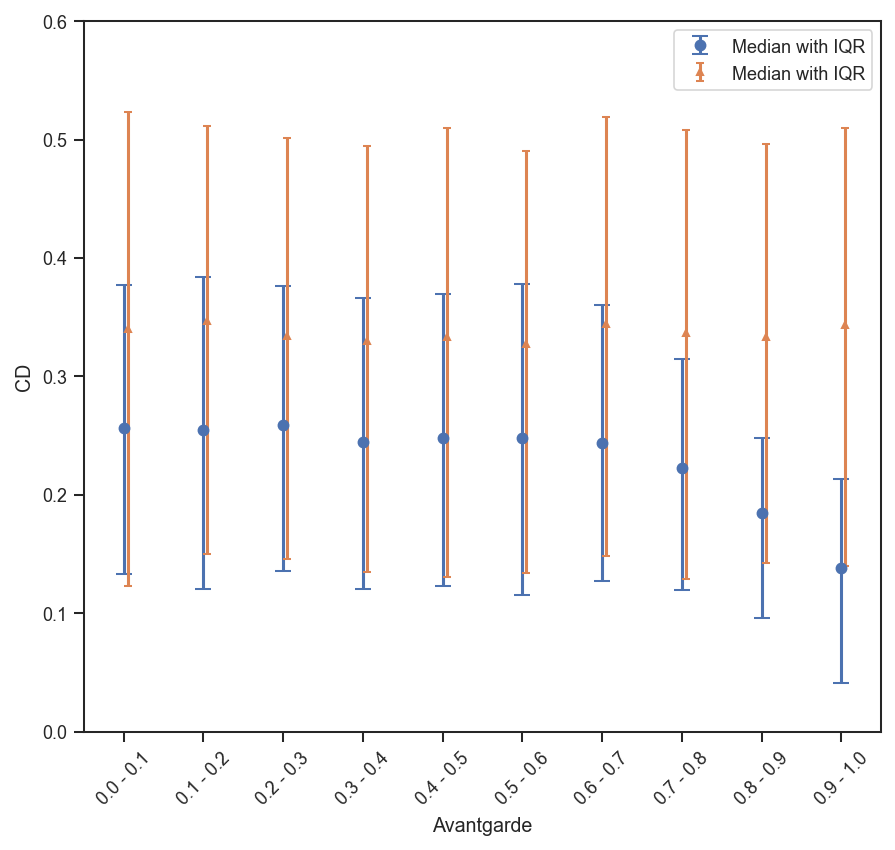

In [134]:
# Improved Metric
# CD (Cognitive Dissonance)
# counts the number of dissonances between Ahat and A_final

f1 = "../data/avantgardeGoal/100k/data_improved_avantgarde-uniform_affinity-uniform_goal-uniform_103.csv"
dtest = load_data(f1)#, columns=['id','avantgarde', 'affinity', 'step'])


finalStep = 180

# considering threshold decision
threshold = .5

def CD(data, finalStep, threshold):
    c = conviction(data, finalStep)
    a = affinity(data, finalStep)
    return abs(c - a)

nbins = 10

def PlotCD(data, finalStep, n):
    
    d={"Avantgarde": np.digitize(avantgarde(data, finalStep), np.linspace(0, 1, nbins+1)),
       "CD": CD(data, finalStep, 0.0),
       "Satisfaction": Satisfaction(data, finalStep)
      }
    df = pd.DataFrame(data=d)

    grouped = df.groupby("Avantgarde")
    
    # compute confidence intervals
    arr = df.groupby("Avantgarde").groups[1]

    # stats.iqr(df.iloc[arr]["CD"], rng=(10, 50))

    median = grouped.mean().get("CD")
    
    s = grouped.mean().get("Satisfaction")
    sStd = grouped.std().get("Satisfaction")
    
    p = 50
    
    upper = np.array([np.percentile(df.iloc[grouped.groups[k]]["CD"], 50 + 0.5 * p) for k in grouped.groups.keys()]) - median
    lower = median - np.array([np.percentile(df.iloc[grouped.groups[k]]["CD"], 50 - 0.5 * p) for k in grouped.groups.keys()])
    
    return grouped.groups.keys(), median, np.stack((lower, upper), axis=0), s, sStd



print("Threshold = 0.5: CD = %.2f" % (CD(dtest, finalStep, 0.5).sum() / 1e4))
keys, m, err, s, sStd = PlotCD(dtest, finalStep, 50)

# filter decisive agents
#print("Threshold = 0.5: CD = %.2f" % (CD(dtest.query("affinityGoal >= 0.6 | affinityGoal <= 0.4"), finalStep, 0.5).sum() / 1e4))
_, m0, err0, s0, sStd0 = PlotCD(dtest, 0, 50)

# -----------------------------------------
def AnalyseCdDist(step):
    meansCD = np.empty((0, 10))
    satisfaction = np.empty((0, 10))
    
    for seed in range(100, 110):
        f1 = f"../data/avantgardeGoal/100k/data_improved_avantgarde-uniform_affinity-uniform_goal-uniform_{seed}.csv"
        _data = load_data(f1)

        d = {
            "Avantgarde": np.digitize(avantgarde(_data, step), np.linspace(0, 1, nbins+1)),
            "CD": CD(_data, step, 0.0),
            "Satisfaction": Satisfaction(_data, step)
        }
        df = pd.DataFrame(data=d)
        grouped = df.groupby("Avantgarde")
        
        meansCD = np.vstack((meansCD, grouped.mean().get("CD")))
        satisfaction = np.vstack((satisfaction, grouped.mean().get("Satisfaction")))
    
    return meansCD, satisfaction

# data aquisition
meansCD_final, sf = AnalyseCdDist(finalStep)
meansCD_initial, si = AnalyseCdDist(0)


        


plt.figure()                      



plt.errorbar(x=keys, y=m,
             yerr=err,
             fmt="o",
             elinewidth=1.5, capsize=4,
             label="Median with IQR"
            )
             
plt.errorbar(x=np.array(list(keys)) + 0.05, y=m0,  # shift x values for dodging
             yerr=err0,
             fmt="^",
             elinewidth=1.5, capsize=2,
             ms=3,
             label="Median with IQR"
            )



#locs, _ = plt.xticks()
plt.xticks(range(1, nbins+1), [f"{k/nbins:.1f} - {(k+1)/nbins:.1f}" for k in range(0, nbins)], rotation=45)

plt.ylim([0, 0.6])
plt.xlim([0.5, 10.5])

plt.legend()
plt.xlabel('Avantgarde')
plt.ylabel('CD')


# diff

plt.show()

C:\Users\hoedtke\AppData\Local\Temp/ipykernel_17896/3614214758.py:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "_" (-> marker='_'). The keyword argument will take precedence.
  ax[1].errorbar(range(1, 11), meansCD_initial.mean(axis=0), yerr=meansCD_initial.std(axis=0),
C:\Users\hoedtke\AppData\Local\Temp/ipykernel_17896/3614214758.py:17: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "_" (-> marker='_'). The keyword argument will take precedence.
  ax[1].errorbar(range(1, 11), meansCD_final.mean(axis=0), yerr=meansCD_final.std(axis=0),
C:\Users\hoedtke\AppData\Local\Temp/ipykernel_17896/3614214758.py:24: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "_" (-> marker='_'). The keyword argument will take precedence.
  ax2.errorbar(range(1, 11), si.mean(axis=0), yerr=si.std(axis=0),
C:\Users\hoedtke\AppData\Local\Temp/ipykernel_17896/36142147

Text(0.5, 1.0, '(b)')

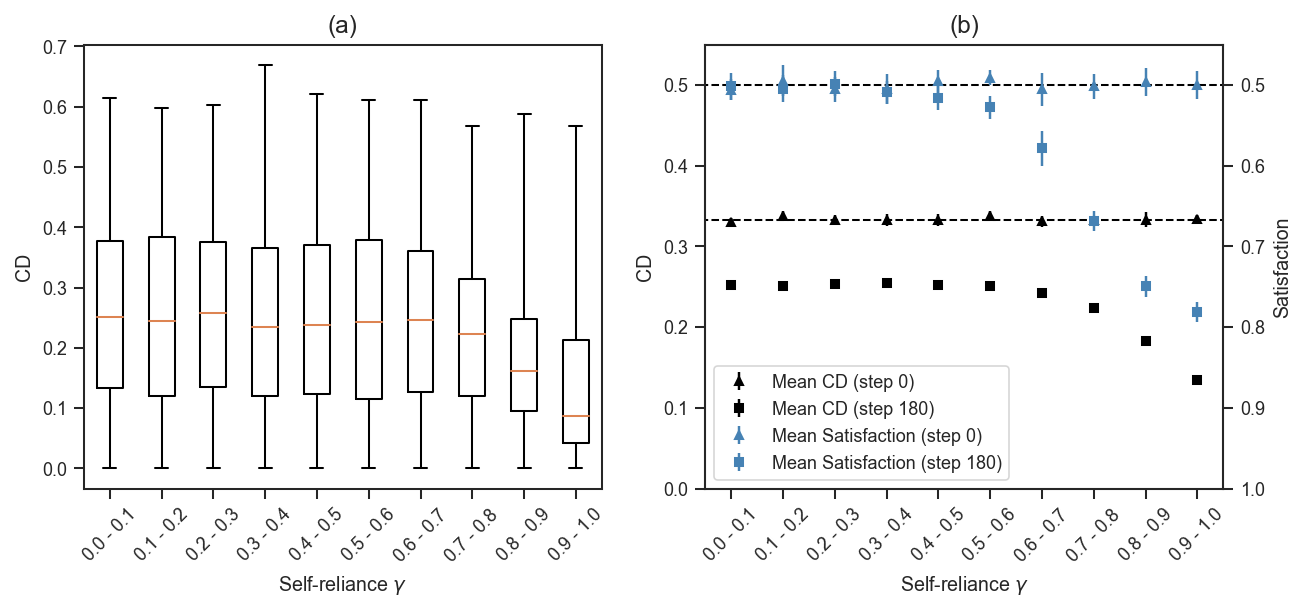

In [140]:
sns.set_context("paper")
sns.set_style("ticks")

# ----------------------------------------
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].boxplot([grouped.get_group(k).get("CD").values for k in range(1, nbins+1)],
              showfliers=False, whis=(0, 100))

ax[1].plot(range(0, 12, 1), 1./3 * np.ones(12), "--", 
           c="black", linewidth=1.0)


ax[1].errorbar(range(1, 11), meansCD_initial.mean(axis=0), yerr=meansCD_initial.std(axis=0), 
               fmt="_", marker="^", ms=4, color="black",
               label="Mean CD (step 0)")
ax[1].errorbar(range(1, 11), meansCD_final.mean(axis=0), yerr=meansCD_final.std(axis=0), 
               fmt="_", marker="s", ms=4, color="black",
               label="Mean CD (step 180)")
ax2 = ax[1].twinx()
ax2.invert_yaxis()
ax2.plot(range(0, 12, 1), 0.5 * np.ones(12), "--", 
           c="black", linewidth=1.0)
ax2.errorbar(range(1, 11), si.mean(axis=0), yerr=si.std(axis=0), 
               fmt="_", marker="^", ms=4, color="steelblue",
               label="Mean Satisfaction (step 0)")
ax2.errorbar(range(1, 11), sf.mean(axis=0), yerr=sf.std(axis=0), 
               fmt="_", marker="s", ms=4, color="steelblue",
               label="Mean Satisfaction (step 180)")
ax2.set_ylabel("Satisfaction")
ax[1].set_ylim([0, 0.55])
ax2.set_ylim([1.0, 0.45])

fig.legend(loc="lower left", bbox_to_anchor=(0,0), bbox_transform=ax2.transAxes)


for axis in ax:
    axis.set_xticks(range(1, nbins+1), [f"{k/nbins:.1f} - {(k+1)/nbins:.1f}" for k in range(0, nbins)], rotation=45)
    axis.set_xlabel(r"Self-reliance $\gamma$")
    axis.set_ylabel("CD")
    #axis.set_ylim([0, 0.6])
    axis.set_xlim([0.5, 10.5])

ax[0].set_title("(a)", fontsize=12)
ax[1].set_title("(b)", fontsize=12)
# ----------------------------------------

In [128]:
d = {"Avantgarde": np.digitize(avantgarde(dtest, 140), np.linspace(0, 1, 10)), "CD": CD(dtest, 140, 0.0)}
df = pd.DataFrame(data=d)#

import scipy.stats as stats

arr = df.groupby("Avantgarde").groups[1]

stats.iqr(df.iloc[arr]["CD"], rng=(10, 50))

np.percentile(df.iloc[arr]["CD"], 75) - np.percentile(df.iloc[arr]["CD"], 25)

TypeError: 'float' object is not callable

0.0348707978686759

Adjustment to goal affinity (|A_goal - A|)


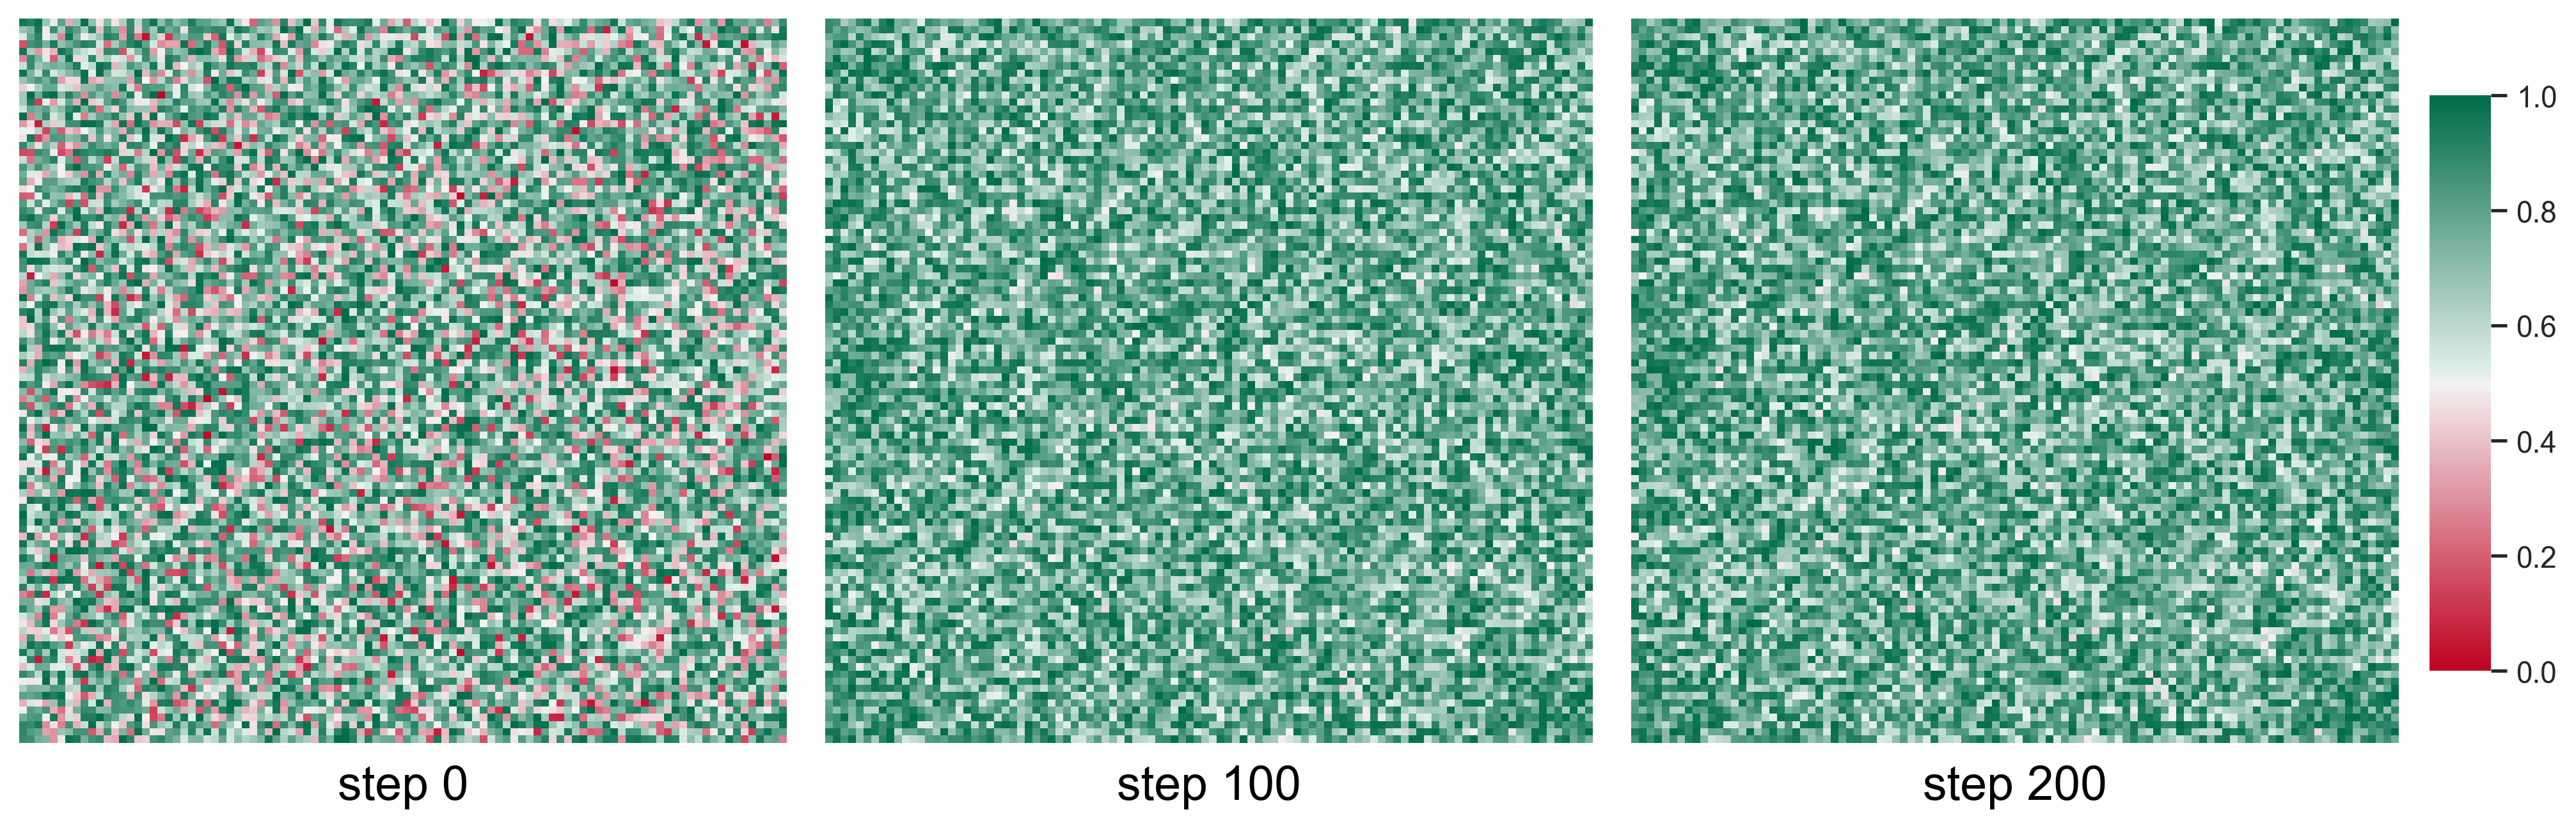

In [425]:
def dAfun(data, step, agentId):
    alpha = 1
    a = avantgarde(data.query("id == @agentId"), step).item(0)
    Acurrent = affinity(data.query("id == @agentId"), step).item(0)
    
    #delta = np.sign(a)
    #a = np.abs(a)

    Ahat = affinityGoal(data.query("id == @agentId"), step).item(0)
    delta = Ahat - Acurrent
    
    W = np.mean(affinity(neighbours(data, agentId), step)) - Acurrent
    dW = (1-a)*W
    dA = dW + a * alpha * delta * abs(W)
    return dA, W, delta, a

# for agentId in np.arange(1, 10000, 1):
#     _dA, W, _delta, a = dAfun(dtest, 160, agentId)
#     if (abs(_delta) < 0.05):
#         print(_delta, W, a)

print("Adjustment to goal affinity (|A_goal - A|)")

fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharex=True, sharey=True)

steps = (0, 100, 200)

cbar_ax = fig.add_axes([.91, .2, .02, .6])
for i, ax in enumerate(axes.flatten()):
    step = steps[i]
    sns.heatmap(ax=ax, data=1.-np.abs(affinityGoal(dtest, step).reshape(100, 100) - affinity(dtest, step).reshape(100, 100)),  
                vmin=0., vmax=1.0, cbar=i==0, cbar_ax=cbar_ax, cmap=cmap_green_red)
    ax.set_title(f"step {step}", x=0.5, y=-0.1, color='black', fontsize=18)
    
for ax in axes.flatten():
    ax.tick_params(left=False, bottom=False)
    ax.set(xticklabels=[], yticklabels=[])

plt.subplots_adjust(wspace=0.05, hspace=0.05)


In [424]:
dtest

step     id  affinity  avantgarde  affinityGoal
0         0      1  0.660911    0.260125      0.701156
1         0      2  0.645691    0.067193      0.729358
2         0      3  0.972755    0.545968      0.949250
3         0      4  0.523990    0.868194      0.850136
4         0      5  0.199381    0.557837      0.679761
...     ...    ...       ...         ...           ...
29995   200   9996  0.650537    0.546545      0.558290
29996   200   9997  0.637972    0.229368      0.593945
29997   200   9998  0.631295    0.685058      0.838972
29998   200   9999  0.628889    0.590378      0.758017
29999   200  10000  0.621845    0.808298      0.858817

[30000 rows x 5 columns]

In [427]:
## Equilibrium plot
# ----------------
# dA = 0
finalState = dtest.query("step == 200")
dA, dW, delta, a = dAfun(finalState, 200, 2)
1-1./a

finalState.query("id == 2")

step  id  affinity  avantgarde  affinityGoal
20001   200   2  0.599398    0.067193      0.729358

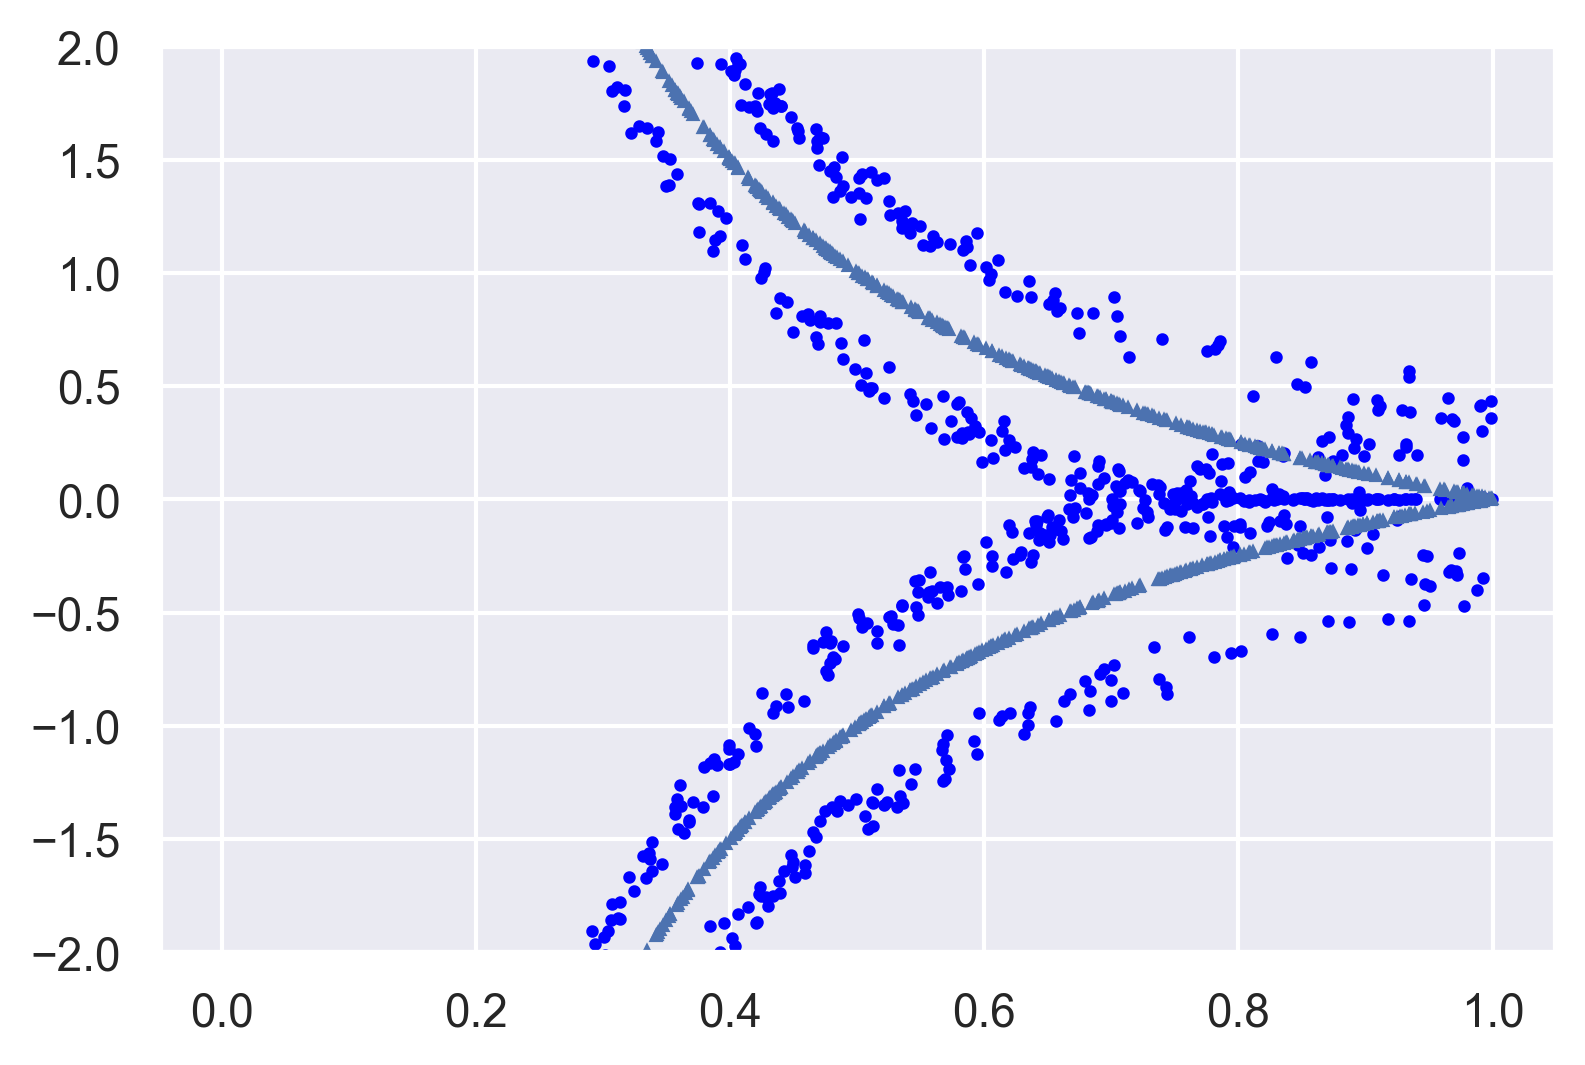

In [431]:
termA = []
termB = []
n = 1000
selection = finalState.query("affinityGoal >= 0.8 | affinityGoal <= 0.2")
for i in range(1, n+1):
    idx = selection.iloc[i-1].get("id")
    dA, dW, delta, a = dAfun(finalState, 200, idx)
    termA.append(dA / (a * abs(dW)))
    termB.append((1 - 1./a )* np.sign(dW))

plt.figure()
plt.plot(avantgarde(selection, 200)[:n], termA, "o", ms=2, c="blue")
plt.plot(avantgarde(selection, 200)[:n], termB, "^", ms=2)
#plt.plot(avantgarde(selection, 200)[:n], CD(selection, 200, 0)[:n], "+", ms=2)

plt.ylim(-2, 2)
plt.show()

In [238]:
# Distribution of rebels (agents with rebelling opinion in homogeneous bubble)

def filterRebels(data, step):
    threshold = 0.5
    ids = []
    
    for i in range(1, 10000, 1):
        nn = neighbours(data, i)
        a = affinity(data.query('id == @i'), step)
        ann = affinity(nn, step)
        
        b = a[0] > threshold
        bnn = np.mean(ann) > threshold
        s = np.sum(ann > threshold)
        bstd = s >= 8 or s <= 0
        
        if (bnn != b) and bstd:
            ids.append(i)
            
    return ids
        
ids = filterRebels(dtest, 140)

In [239]:
aArr, deltaArr = [], []
for rebel in ids:
    _, _, delta, a = dAfun(dtest, 140, rebel)
    aArr.append(a)
    deltaArr.append(delta)

aMean, aMedian, aMin, aMax = np.mean(aArr), np.median(aArr), np.min(aArr), np.max(aArr)
print(f"Avantgarde: Min: {aMin:.2f}\t Max: {aMax:.2f}\t Mean: {aMean:.2f}\t Median: {aMedian:.2f}\t")

Avantgarde: Min: 0.62	 Max: 1.00	 Mean: 0.83	 Median: 0.84	


In [54]:
dtest["step"].unique()

array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102,
       104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128,
       130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154,
       156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180,
       182, 184, 186, 188, 190, 192, 194, 196, 198], dtype=int64)

In [900]:
# which equilibrium?
alpha = 1
agentId = 4020

data = dtest
step = 200

a = avantgarde(data.query("id == @agentId"), step).item(0)
delta = np.sign(a)
a = np.abs(a)

#Ahat = affinityGoal(data.query("id == @agentId"), step).item(0)
Acurrent = affinity(data.query("id == @agentId"), step).item(0)

#delta = Ahat - Acurrent

W = np.mean(affinity(neighbours(data, agentId), step)) - Acurrent

print(1 - abs(W))

(1-a)*W + a * alpha * delta * (1- abs(W))

0.8442894863887928


0.003529339672987325

In [45]:
#affinityarr = dtest.groupby("step").std().get("affinity")
n=6
bins = np.linspace(0, 1., n)
dtest["Conviction Groups"] = np.digitize(dtest["affinityGoal"], bins=bins, right=True)
dtest["Conviction Groups"] = dtest["Conviction Groups"].apply(lambda x: fr"$c_i \in \left[{bins[x-1]:.1f}, {bins[x]:.1f}\right]$")

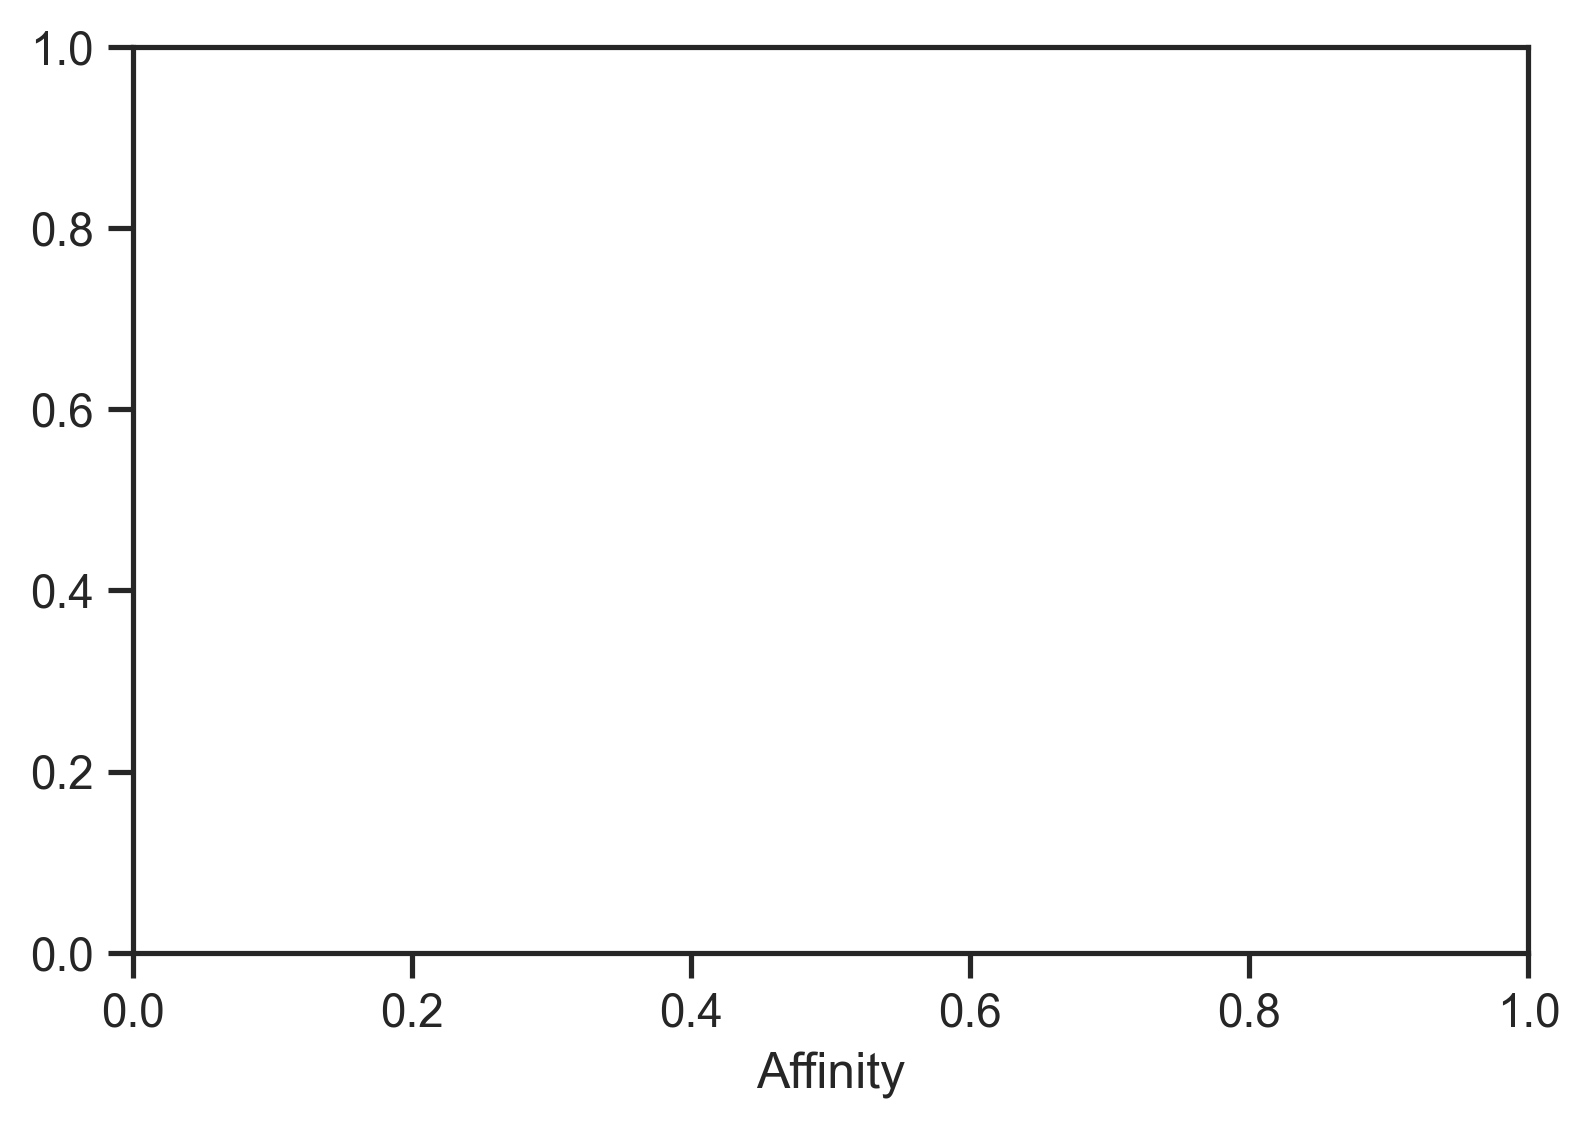

In [46]:
group_label = lambda x: fr"$c_i \in \left[{bins[x-1]:.1f}, {bins[x]:.1f}\right]$"
order = [group_label(x) for x in range(1, n, 1)]
plt.figure(figsize=(6, 4))

cpalette = sns.diverging_palette(30, 220, s=100, l=40, n=n-1)
ax = sns.histplot(data=dtest.query("step == 198").query("avantgarde > 0.5"), x="affinity", hue="Conviction Groups", 
             bins=12, binrange=(0, 1), element="step", fill=False, hue_order=order, palette=cpalette)
ax.set_xlabel(r'Affinity')
plt.show()

In [662]:
dataset = None
# load data set
for k in range(100, 110, 1):
    file = "../data/avantgardeGoal/100k/data_improved_avantgarde-uniform_affinity-uniform_goal-uniform_%3d.csv" % k
    _data = load_data(file)
    if dataset is not None:
        pd.concat([dataset, _data.query("step == 180").query("avantgarde >= 0.0")])
    else:
        dataset = _data

In [977]:
n=7
bins = np.linspace(0, 1., n)
dataset["Belief Groups"] = np.digitize(dataset["affinityGoal"], bins=bins, right=True)
dataset["Belief Groups"] = dataset["Belief Groups"].apply(lambda x: fr"$b_i \in \left[{bins[x-1]:.2f}, {bins[x]:.2f}\right]$")

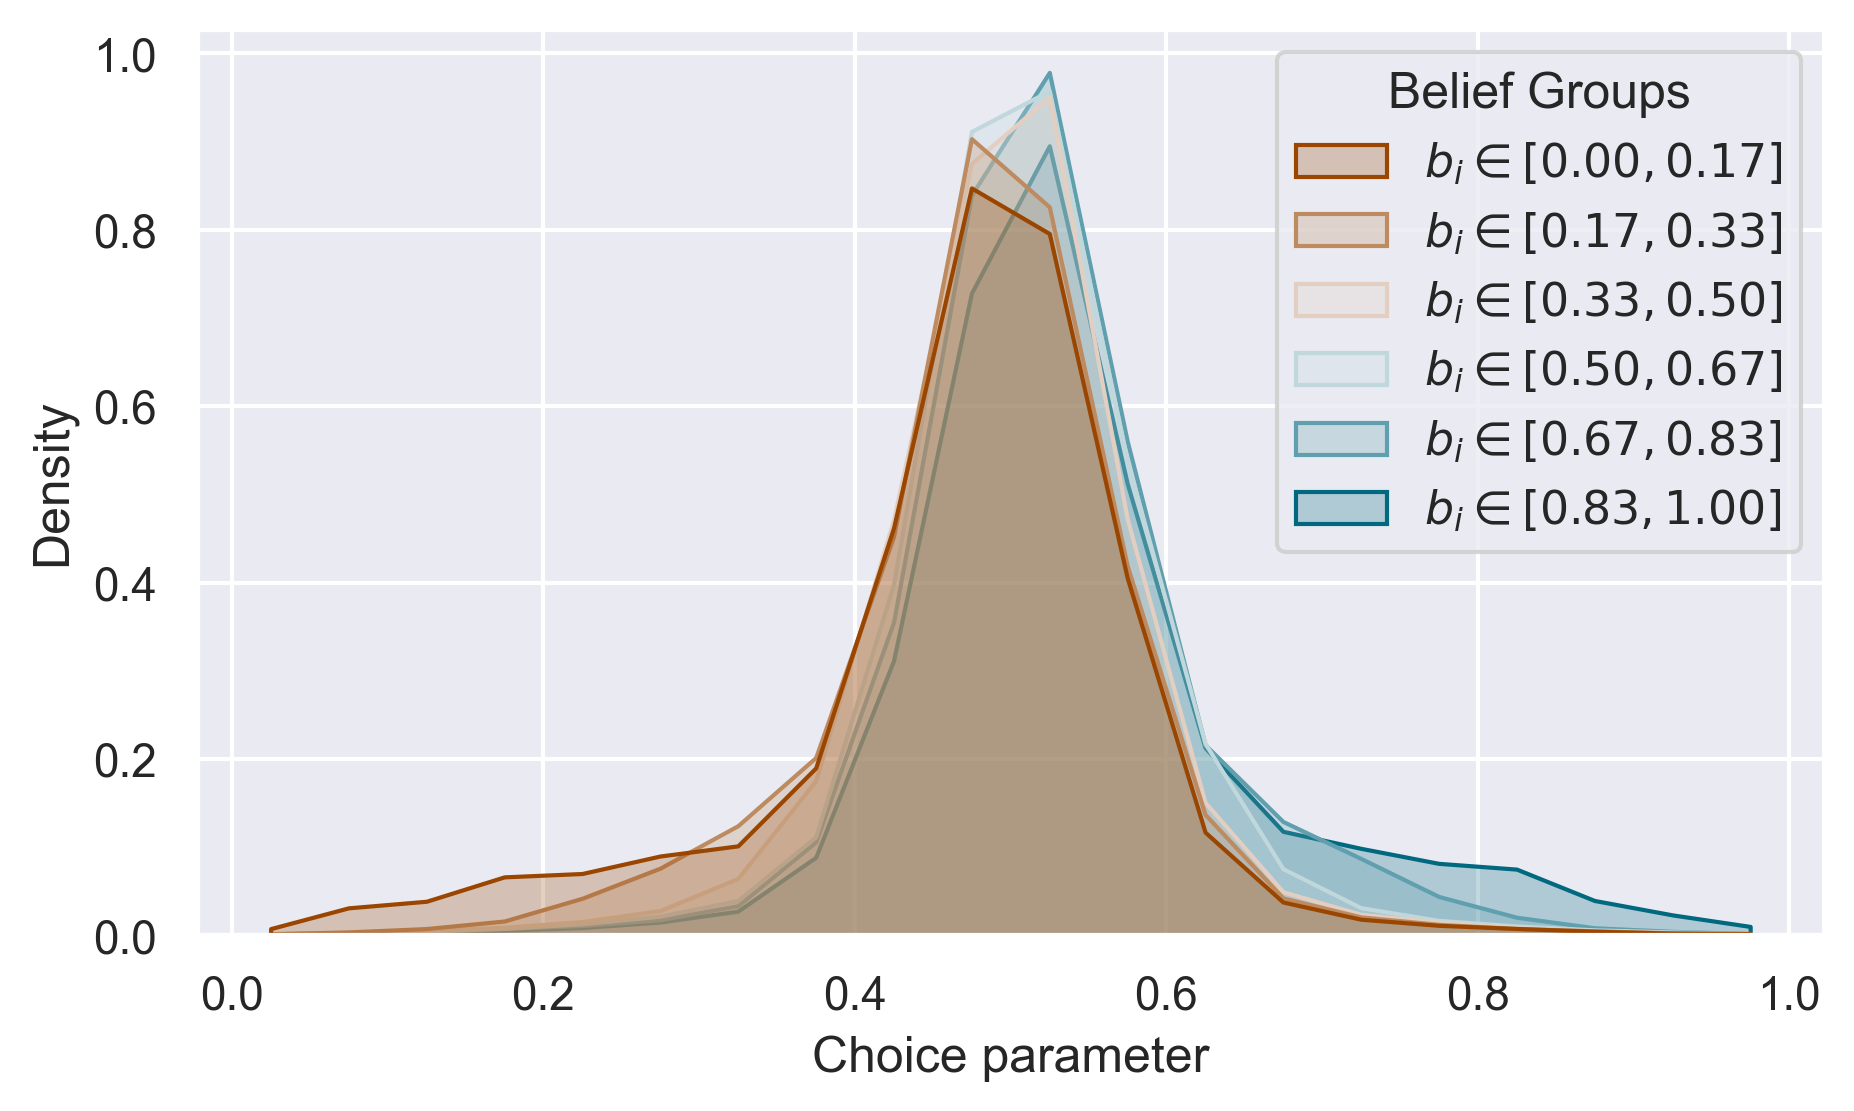

In [981]:
group_label = lambda x: fr"$b_i \in \left[{bins[x-1]:.2f}, {bins[x]:.2f}\right]$"
order = [group_label(x) for x in range(1, n, 1)]
plt.figure(figsize=(7, 4))

cpalette = sns.diverging_palette(30, 220, s=110, l=40, n=n-1)
ax = sns.histplot(data=dataset, x="affinity", hue="Belief Groups", stat="density",
             bins=20, binrange=(0, 1), multiple="layer", element="poly", fill=True, hue_order=order, palette=cpalette)
ax.set_xlabel(r'Choice parameter')
plt.show()

In [603]:
dataset

step     id  affinity  avantgarde  affinityGoal  \
0          0      1  0.660911    0.260125      0.190313   
1          0      2  0.645691    0.067193      0.967600   
2          0      3  0.972755    0.545968      0.526845   
3          0      4  0.523990    0.868194      0.172707   
4          0      5  0.199381    0.557837      0.893169   
...      ...    ...       ...         ...           ...   
999995   198   9996  0.486265    0.546545      0.231977   
999996   198   9997  0.487120    0.229368      0.247023   
999997   198   9998  0.540750    0.685058      0.530775   
999998   198   9999  0.571064    0.590378      0.821052   
999999   198  10000  0.603401    0.808298      0.804085   

                      Conviction Groups  
0       $c_i \in \left[0.2, 0.3\right]$  
1       $c_i \in \left[0.8, 1.0\right]$  
2       $c_i \in \left[0.5, 0.7\right]$  
3       $c_i \in \left[0.2, 0.3\right]$  
4       $c_i \in \left[0.8, 1.0\right]$  
...                                 ...  
999995  $c_i \in \left[0.2, 0.3\right]$  
999996  $c_i \in \left[0.2, 0.3\right]$  
999997  $c_i \in \left[0.5, 0.7\right]$  
999998  $c_i \in \left[0.7, 0.8\right]$  
999999  $c_i \in \left[0.7, 0.8\right]$  

[1000000 rows x 6 columns]

In [119]:
columns = ['id','avantgarde', 'affinity', 'affinityGoal', 'step']
file = "../data/constant_avantgarde/agent_data_800steps_1.csv"

dtemp = load_data(file, columns).query("step == 800").query("avantgarde == 0.2")

In [120]:
np.unique(dtemp["affinity"].round(3))

array([0.475, 0.476, 0.477, 0.478, 0.479, 0.48 , 0.481, 0.482, 0.483,
       0.484, 0.485, 0.486, 0.487, 0.488, 0.489, 0.49 , 0.491, 0.492,
       0.493, 0.494, 0.495, 0.496, 0.497, 0.498, 0.499, 0.5  , 0.501,
       0.502, 0.503, 0.504, 0.505, 0.506, 0.507, 0.508, 0.509, 0.51 ,
       0.511, 0.512, 0.513, 0.514, 0.515, 0.516, 0.517, 0.518, 0.519,
       0.52 , 0.521, 0.522, 0.523, 0.524, 0.525, 0.526, 0.527, 0.528,
       0.529, 0.53 , 0.531, 0.532, 0.533, 0.534, 0.535, 0.536, 0.537,
       0.538, 0.539, 0.54 , 0.541, 0.542, 0.543, 0.544])

In [93]:
import sys
print(sys.getrecursionlimit())
#sys.setrecursionlimit(5000)

k = 150

def DFS(i, j, data, visited, value=0):
    
    nodes_to_visit = [[i, j]]
    size = 0
    
    if visited[i, j] or data[i, j] != value:
        return size
    
    rowNeighbours = [-1, 0, 0, 1]#[-1, -1, -1, 0, 0, 1, 1, 1]
    columnNeighbours = [0, -1, 1, 0]#[-1, 0, 1, -1, 1, -1, 0, 1]
    
    while len(nodes_to_visit) > 0:
        i, j = nodes_to_visit[0]
        
        if not visited[i, j] and data[i, j] == value:
            for r, c in zip(rowNeighbours, columnNeighbours):
                iNew = (i+r) % data.shape[0]
                jNew = (j+c) % data.shape[1]
                nodes_to_visit.append([iNew, jNew])
                
            size += 1
            
        visited[i, j] = 1
        nodes_to_visit.pop(0)
    
    return size

def CountSizes(data):
    counts = {key: [] for key in np.unique(data.flatten())}
    for c in counts.keys():
        visited = np.zeros(data.shape)
        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                size = DFS(i, j, data, visited, value=c)
                if size > 1:
                    counts[data[i, j]].append(size)
    return counts

grid = lambda data, step: affinity(data, step).reshape(100, 100)
islands = np.digitize(grid(dtest, 800), bins=np.arange(0, 1, 0.5))
#islands = np.array([[1, 0, 0, 0],
#                    [0, 5, 0, 0],
#                    [0, 5, 1, 0],
#                    [0, 0, 5, 5]])
#size = DFS(2, 2, islands, visited=np.zeros(islands.shape), value=1)
#print(size)
#visited

counts = CountSizes(islands)
print({key: (len(count), np.mean(count).round(2), np.std(count).round(2)) for key, count in counts.items()})

3000
{1: (31, 148.13, 601.91), 2: (27, 194.67, 762.61)}


In [85]:
def IndexToCoords(index, Nx):
    coords = np.zeros(2, dtype='int32')
    coords[1] = int(index % Nx)
    coords[0] = int(index / Nx)
    return coords

def CoordsToIndex(coords, Nx):
    return int(coords[0] * Nx + coords[1])

f1 = "../data/avantgardeGoal/100k/data_improved_avantgarde-uniform_affinity-uniform_goal-uniform_100.csv"
data = load_data(f1).query("step == 198")
grid_data = grid(data, 198)
sizes = np.ndarray((0, 2))

for i, avantgarde in enumerate(data["avantgarde"][:]):
    visited = np.zeros(grid_data.shape)
    x, y = IndexToCoords(i, 100)
    cluster_data = np.digitize(grid_data, bins=np.arange(0, 1, 0.5))
    v = cluster_data[x, y]
    s = np.array([[avantgarde, DFS(x, y, cluster_data, visited, value=v)]])
    sizes = np.append(sizes, s, axis=0)

KeyboardInterrupt: 

In [110]:
np.median(np.unique(sizes[:, 1])) / 10000

0.00355

In [94]:
# connectivity for different a
# -----------------------------
@dataclass
class Counts:
    a: float
    positive: []
    negative: []
        

def GetCountsForA(a, counts_arr):
    for c in counts_arr:
        if c.a == a:
            return c
    # if not existing
    c = Counts(a, [], [])
    counts_arr.append(c)
    return c


def AddCounts(a, positive, negative, counts_arr):
    c = GetCountsForA(a, counts_arr)
    c.positive.append(positive)
    c.negative.append(negative)
    

aa = np.linspace(0.01, 1.0, 100)
keys = [*range(1, 20)]

counts_list = []

for k in keys:
    columns = ['id','avantgarde', 'affinity', 'affinityGoal', 'step']
    file = f"../data/constant_avantgarde/agent_data_800steps_{k}.csv"
    data = load_data(file, columns)
    step = 800
    
    for a in aa[:]:
        a = np.round(a, 2)

        # >--- get cluster sizes
        grid_data = grid(data.query("avantgarde == @a"), step)
        labeled_data = np.digitize(grid_data, bins=np.arange(0, 1, 0.5))
        clusters = CountSizes(labeled_data)
        # ---<
        
        # save data
        AddCounts(a, clusters[2], clusters[1], counts_list)
        
    print(f"Finished key {k}.")


Finished key 1.
Finished key 2.
Finished key 3.
Finished key 4.
Finished key 5.
Finished key 6.
Finished key 7.
Finished key 8.
Finished key 9.
Finished key 10.
Finished key 11.
Finished key 12.
Finished key 13.
Finished key 14.
Finished key 15.
Finished key 16.
Finished key 17.
Finished key 18.
Finished key 19.


In [95]:
@dataclass
class CountResult:
    a: float
    cPmean: float # positive
    cPstd: float
    cNmean: float # negative
    cNstd: float


def createResult(counts, fun):
    result = []
    for c in counts:
        count_result = CountResult(c.a, 
                                   np.mean([fun(s) for s in c.positive]),
                                   np.std([fun(s) for s in c.positive]),
                                   np.mean([fun(s) for s in c.negative]),
                                   np.std([fun(s) for s in c.negative]))

        result.append(count_result)
    return result
        
resultsMax = createResult(counts_list, np.max)
resultsMedian = createResult(counts_list, np.median)

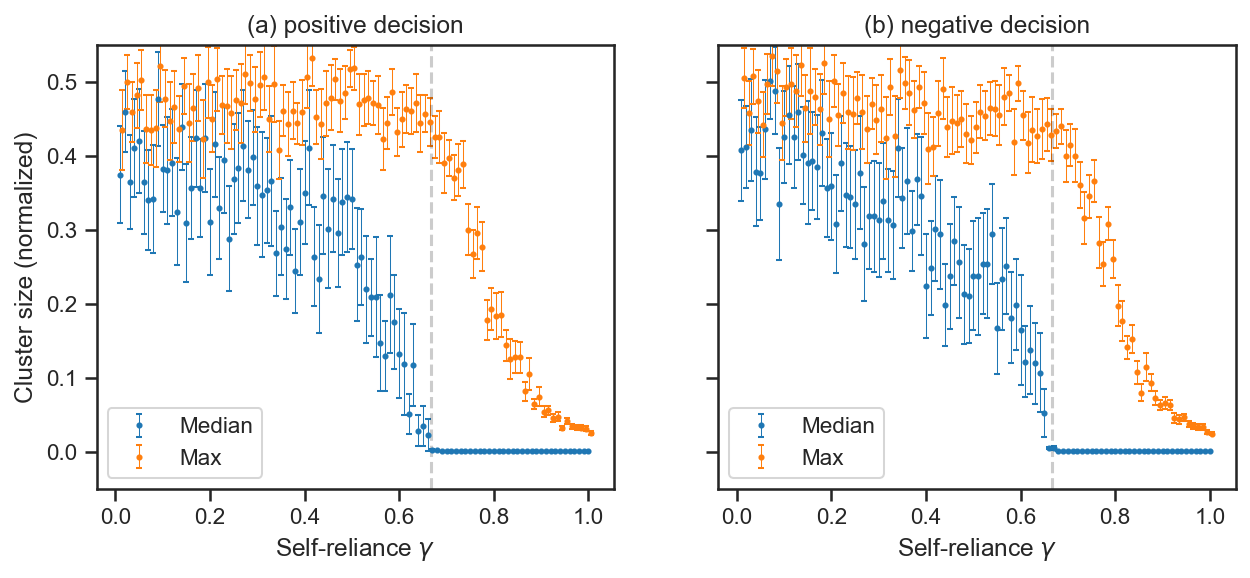

In [122]:
# prepare data
N = 10000
scale = 1.0 / N
x = np.array([c.a for c in resultsMedian])
y = np.array([c.cPmean for c in resultsMedian]) * scale
std = np.array([c.cPstd for c in resultsMedian]) * scale / np.sqrt(10)

xmax = np.array([c.a for c in resultsMax])
ymax = np.array([c.cPmean for c in resultsMax]) * scale
stdmax = np.array([c.cPstd for c in resultsMax]) * scale / np.sqrt(10)

xN = np.array([c.a for c in resultsMedian])
yN = np.array([c.cNmean for c in resultsMedian]) * scale
stdN = np.array([c.cNstd for c in resultsMedian]) * scale / np.sqrt(10)

xNmax = np.array([c.a for c in resultsMax])
yNmax = np.array([c.cNmean for c in resultsMax]) * scale
stdNmax = np.array([c.cNstd for c in resultsMax]) * scale/ np.sqrt(10)

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

data = [(x, y, std), (xN, yN, stdN)]
datamax = [(xmax, ymax, stdmax), (xNmax, yNmax, stdNmax)]

for ax, (x, y, err), (xmax, ymax, errmax) in zip(axes, data, datamax):
    ax.errorbar(x[::], y[::], yerr=err[::1], 
             linestyle="", marker=".", ms=4, elinewidth=0.5, capsize=1.5, color="tab:blue",
             label="Median")

    ax.errorbar(xmax[::]+0.005, ymax[::], yerr=errmax[::], 
             linestyle="", marker=".", ms=4, elinewidth=0.5, capsize=1.5, color="tab:orange",
             label="Max")
#plt.plot(x, y)

    ymin, ymax = -0.1 / 2, 1.1 / 2
    ax.vlines(2./3, ymin, ymax, colors="black", linestyles="dashed", alpha=0.2)

    ax.set_ylim([ymin, ymax])

    ax.legend(loc="lower left")
    
    ax.set_xlabel(r"Self-reliance $\gamma$")

axes[0].set_ylabel("Cluster size (normalized)")

axes[0].title.set_text("(a) positive decision")
axes[1].title.set_text("(b) negative decision")

plt.show()

In [671]:
import glob

counts = None

for file in glob.glob('../data/po100k/data_avantgarde-normal-0.0-0.3_affinity-constant-0.2*.csv'):
    dtest = load_data(file)
    islands = np.digitize(grid(dtest, 300), bins=np.arange(0, 1, 0.1))
    countsCurrent = CountSizes(islands)
    
    if counts:
        for key, val in countsCurrent.items():
            counts[key].extend(val)
    else:
        counts=countsCurrent

In [686]:
arr = np.array([[(0.1*key - 0.1).round(1), val] for key, count in counts.items() for val in count])
countsDataFrame = pd.DataFrame(data=arr, columns=["Affinity", "Island Size"])
countsDataFrame["$A_0$"] = "uniform"

In [672]:
arr = np.array([[(0.1*key - 0.1).round(1), val] for key, count in counts.items() for val in count])
countsDataFrameTmp = pd.DataFrame(data=arr, columns=["Affinity", "Island Size"])
countsDataFrameTmp["$A_0$"] = "constant (0.2)"

countsDataFrame = countsDataFrame.append(countsDataFrameTmp, ignore_index=True)

In [609]:
arr = np.array([[(0.1*key - 0.1).round(1), val] for key, count in counts.items() for val in count])
countsDataFrameTmp = pd.DataFrame(data=arr, columns=["Affinity", "Island Size"])
countsDataFrameTmp["$A_0$"] = "uniform"

countsDataFrame = countsDataFrame.append(countsDataFrameTmp, ignore_index=True)

<AxesSubplot:xlabel='Affinity', ylabel='Island Size'>

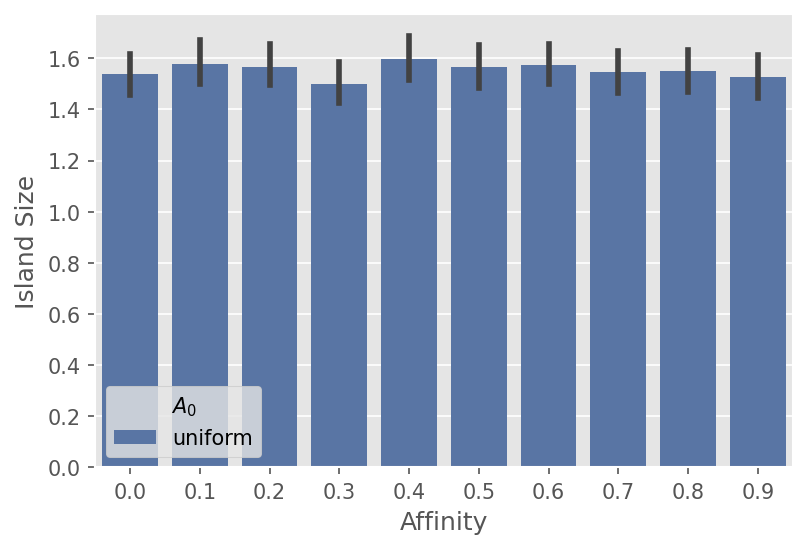

In [687]:
sns.barplot(data=countsDataFrame, x="Affinity", y="Island Size", hue="$A_0$")

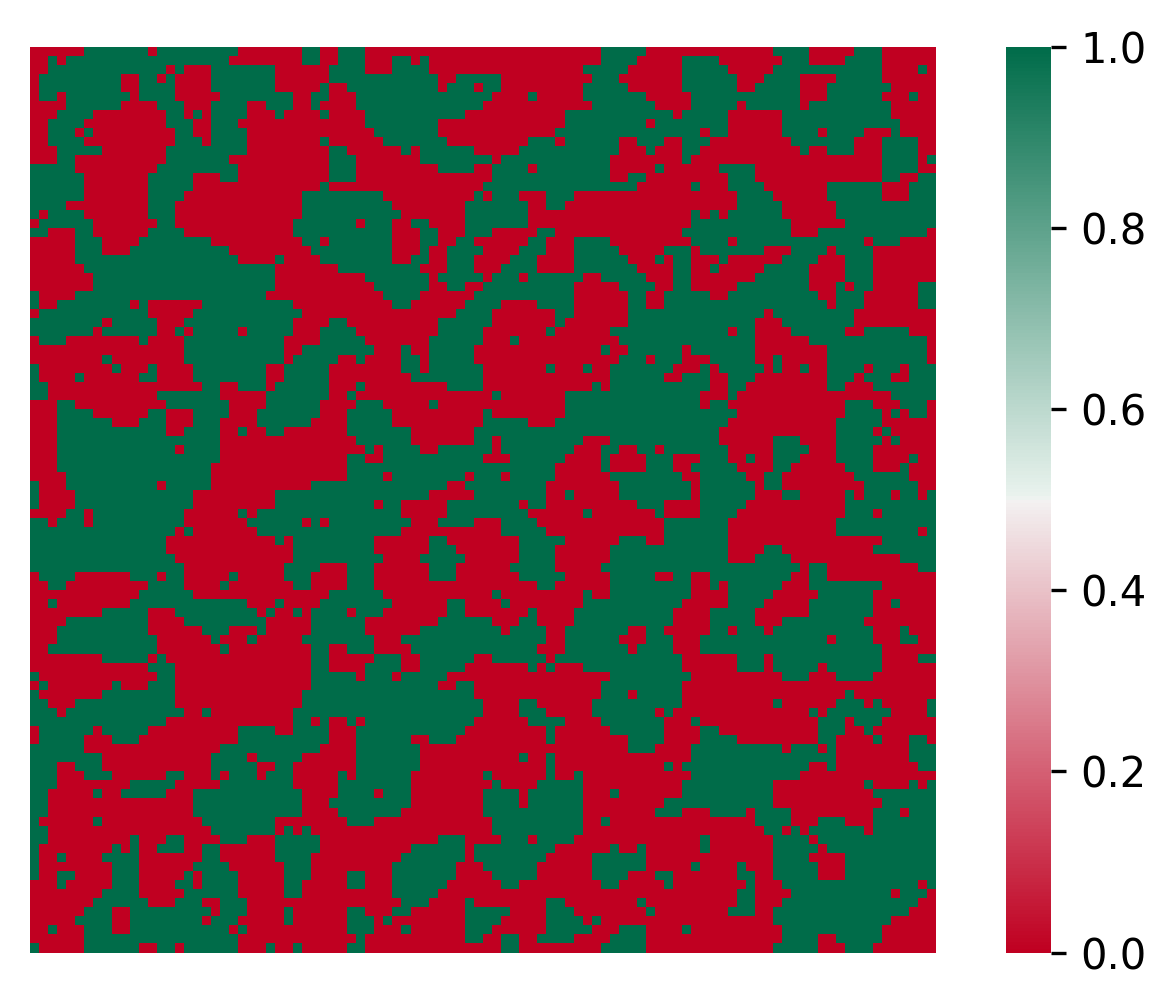

In [47]:
plt.figure()

ax = sns.heatmap(data=grid(data.query("avantgarde == 0.71").query("seed == 100"), 500) < 0.5,  vmin=0., vmax=1.0, cmap=cmap_green_red, square=True)
cl = "black"#'black' if affinity(data, step).mean() > 0.4 else 'white'
#ax.set_title(f"step {0}", x=0.5, y=-0.1, color=cl, fontsize=18)
ax.tick_params(left=False, bottom=False)
ax.set(xticklabels=[], yticklabels=[])

plt.subplots_adjust(wspace=0.05, hspace=0.05)

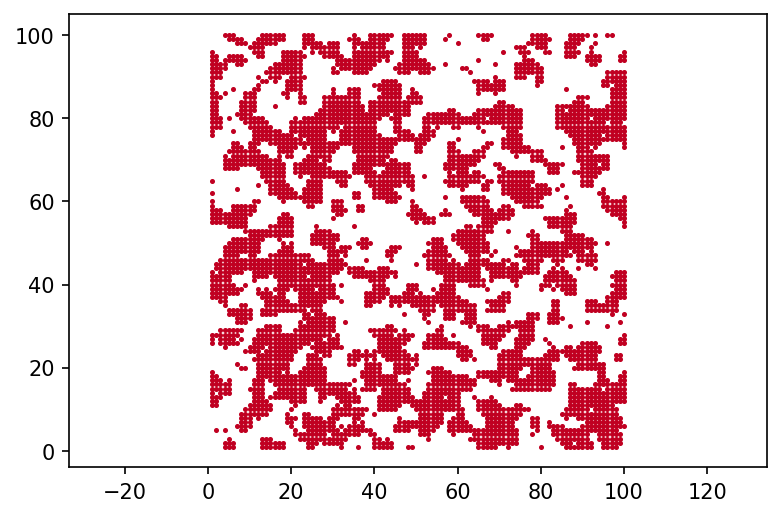

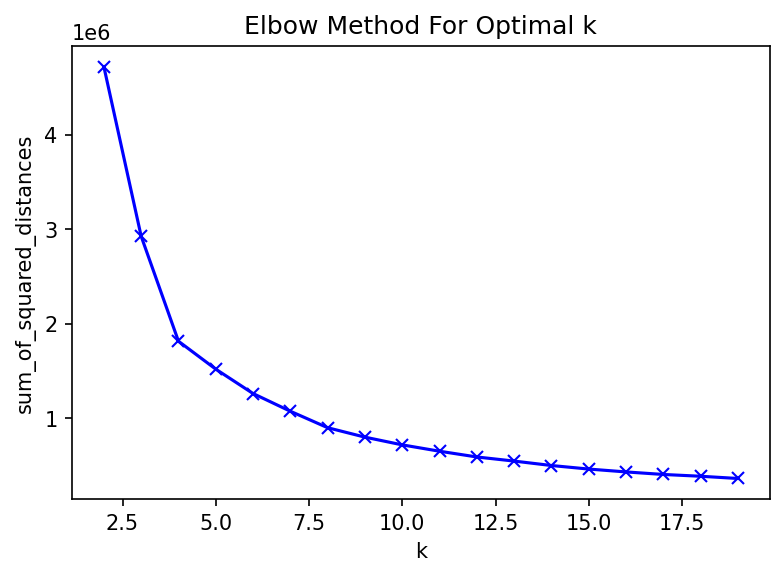

In [401]:
# KMeans clustering
from sklearn.cluster import KMeans

# convert state into x, y coordinates
step = 140
state = dtest.query("step == @step").get(["affinity", "avantgarde", "affinityGoal"])\
    .copy().reset_index(drop=True)

x = np.linspace(1, 100, 100)
xv, yv = np.meshgrid(x, x)
state["x"] = xv.flatten()
state["y"] = yv.flatten()

positive = state.query("affinity < 0.5")
plt.scatter(positive["x"], positive["y"], s=2)
plt.axis("equal")

data = positive.get(["x", "y"])

sum_of_squared_distances = []
K = range(2,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    sum_of_squared_distances.append(km.inertia_)

plt.figure()
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


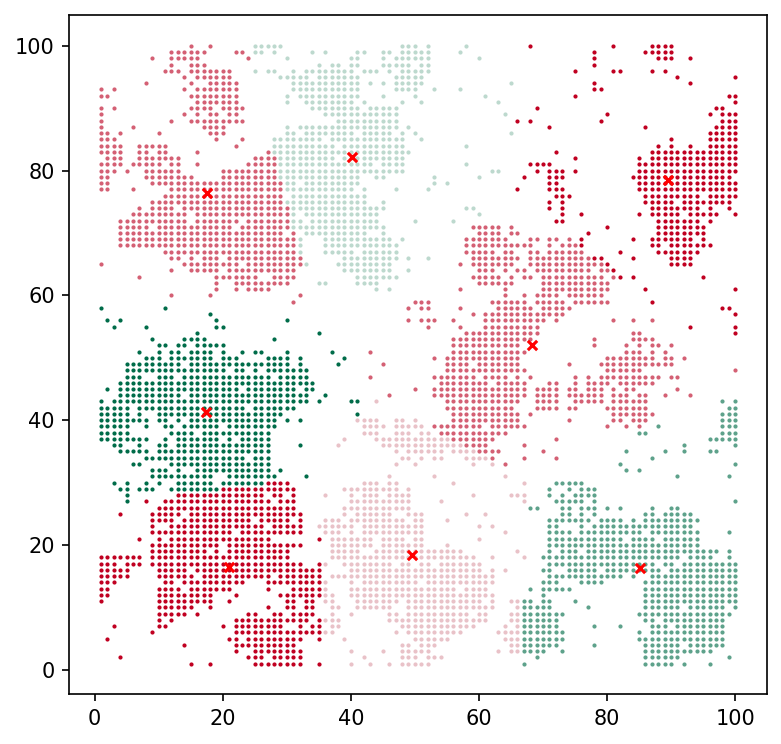

In [399]:

n_clusters = 8
kmeans = KMeans(random_state=10, n_clusters=n_clusters, algorithm='full')
kmeans.fit(data)

plt.figure(figsize=(6, 6))

for i in range(n_clusters):
    bunch = positive[kmeans.labels_ == i]
    plt.scatter(bunch["x"], bunch["y"], s=1)

# scatter centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=20, c='red')

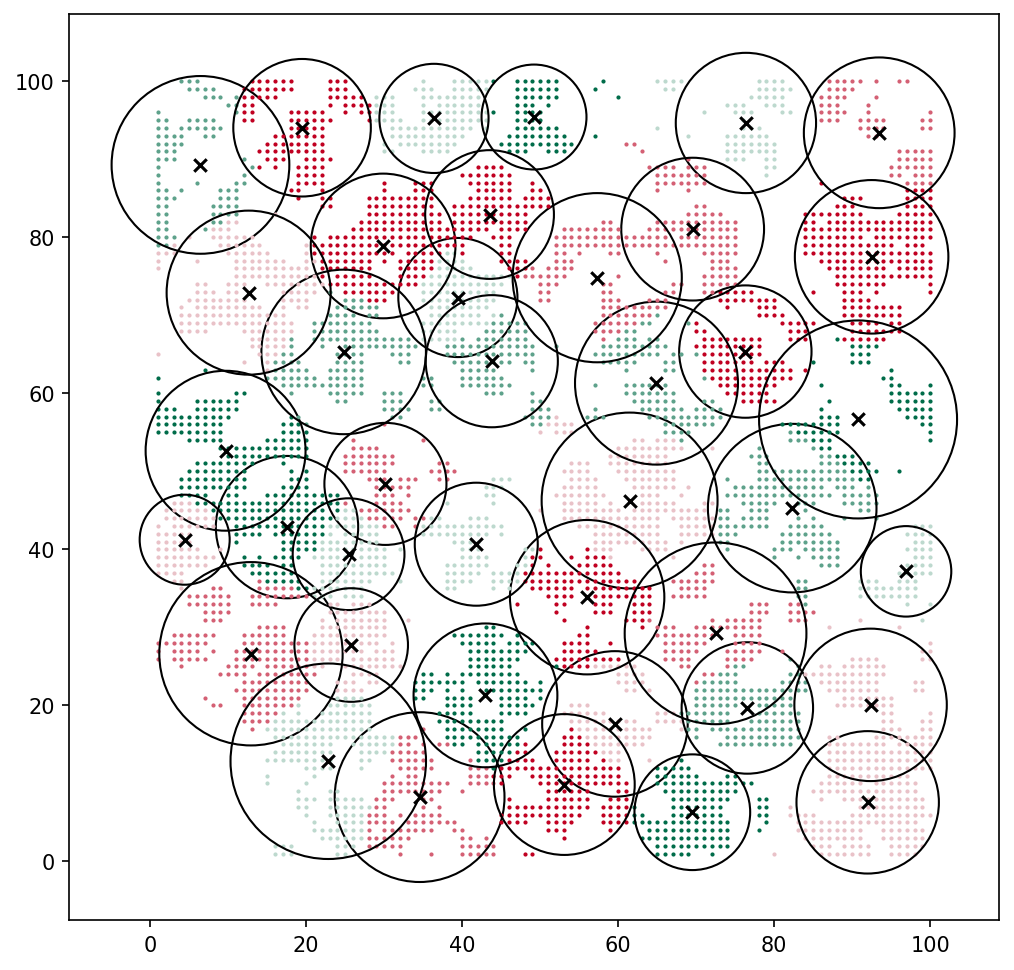

In [690]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=41, random_state=0,
                    covariance_type='spherical').fit(data)
labels = gm.predict(data)

fig = plt.figure(figsize=(8, 8))

for i in range(40):
    bunch = data[labels == i]
    plt.scatter(bunch["x"], bunch["y"], s=1)
    plt.scatter(gm.means_[i][0], gm.means_[i][1], marker='x', color='black')
    sigma = np.sqrt(gm.covariances_[i])
    circle = plt.Circle(gm.means_[i], 2*sigma, color='black', fill=False)
    fig.gca().add_patch(circle)

plt.axis('equal')
plt.show()

In [ ]:
x

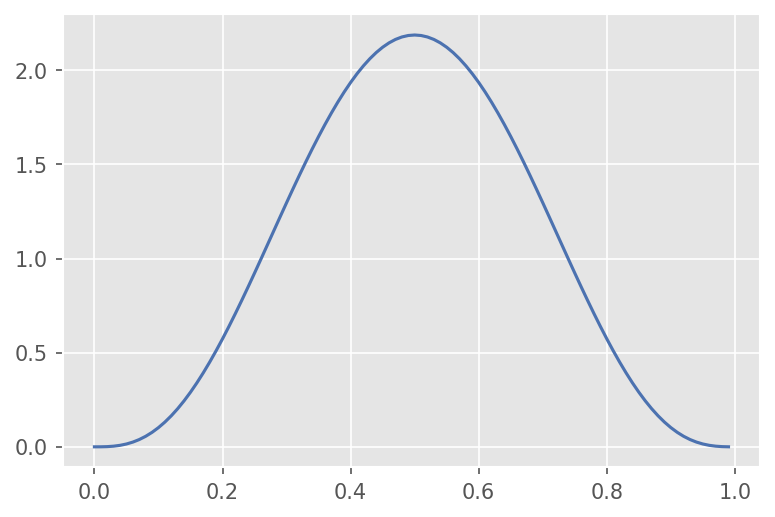

In [176]:
import scipy as sp

a, b = 4., 4.0
pdfBeta = lambda x: (x**(a-1)*(1-x)**(b-1)) / sp.special.beta(a, b)

x = np.arange(0, 1, 0.01)

plt.figure()
plt.plot(x, pdfBeta(x))
plt.show()